In [1]:
import sys
import os
import torch
import torch.optim as optim
from torch import nn
from torch.nn.functional import binary_cross_entropy_with_logits
torch.manual_seed(32)
import numpy as np
np.random.seed(32)
import matplotlib.pyplot as plt
import h5py
sys.path.append(os.getcwd())

In [2]:


def list_all_dataset_paths(file_path):
    """
    List all dataset paths in the HDF5 file.

    Args:
        file_path (str): Path to the HDF5 file.

    Returns:
        list: A list of dataset paths.
    """
    dataset_paths = []

    def visitor(name, obj):
        """
        Visitor function to collect dataset paths.

        Args:
            name (str): The name/path of the object.
            obj (h5py.Dataset or h5py.Group): The HDF5 object.
        """
        if isinstance(obj, h5py.Dataset):
            dataset_paths.append(name)
    
    with h5py.File(file_path, 'r') as hdf:
        hdf.visititems(visitor)
    
    return dataset_paths
ATLAS_raw_dir = '/fast_scratch_1/caloqvae/data/atlas_test/dataset_eta_020_positive.hdf5'
all_objects = list_all_dataset_paths(ATLAS_raw_dir)
for single_object in all_objects:
    with h5py.File(ATLAS_raw_dir, 'r') as hdf:
        showers_data = hdf[single_object][:]
    showers_tensor = torch.tensor(showers_data, dtype=torch.float32)
    print(f'{single_object}: {showers_tensor.shape}')

binsize_alpha_layer_0: torch.Size([36])
binsize_alpha_layer_1: torch.Size([164])
binsize_alpha_layer_10: torch.Size([36])
binsize_alpha_layer_11: torch.Size([36])
binsize_alpha_layer_12: torch.Size([36])
binsize_alpha_layer_13: torch.Size([36])
binsize_alpha_layer_14: torch.Size([36])
binsize_alpha_layer_15: torch.Size([36])
binsize_alpha_layer_16: torch.Size([36])
binsize_alpha_layer_17: torch.Size([36])
binsize_alpha_layer_18: torch.Size([36])
binsize_alpha_layer_19: torch.Size([36])
binsize_alpha_layer_2: torch.Size([110])
binsize_alpha_layer_20: torch.Size([36])
binsize_alpha_layer_21: torch.Size([36])
binsize_alpha_layer_22: torch.Size([36])
binsize_alpha_layer_23: torch.Size([36])
binsize_alpha_layer_3: torch.Size([36])
binsize_alpha_layer_4: torch.Size([36])
binsize_alpha_layer_5: torch.Size([164])
binsize_alpha_layer_6: torch.Size([110])
binsize_alpha_layer_7: torch.Size([36])
binsize_alpha_layer_8: torch.Size([36])
binsize_alpha_layer_9: torch.Size([36])
binsize_radius_layer_0

In [3]:
datasets = ['binsize_alpha', 'binstart_alpha', 'binsize_radius', 'binstart_radius', 'energy']
labels = ['incident_energy', 'eta_mod','phi_mod']

In [4]:
with h5py.File(ATLAS_raw_dir, 'r') as hdf:
    showers_data = hdf["binstart_alpha_layer_23"][:]


In [ ]:
class_name = f'incident_energy'
with h5py.File(ATLAS_raw_dir, 'r') as hdf:
    showers_data = hdf[class_name][:]
# showers_tensor = torch.tensor(showers_data, dtype=torch.float32)

def create_log_bins(lower_bound, upper_bound, num_bins):

    if lower_bound <= 0 or upper_bound <= 0:
        raise ValueError("Upper and lower bounds must be positive.")
    if upper_bound <= lower_bound:
        raise ValueError("Upper bound must be greater than lower bound.")
    if num_bins < 1:
        raise ValueError("Bin count must be greater than 0.")
    
    # 生成对数刻度的边界
    bins = np.logspace(np.log10(lower_bound), np.log10(upper_bound), num_bins + 1)
    return bins

# 示例用法
lower = 100
upper = 10000000
bins = create_log_bins(lower, upper, 50)
plt.hist(showers_data.flatten(), bins=bins, density=True)
plt.title('Incident Energy')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Events/ (Bin-width x Total Events)')
plt.xlabel('Energy (MeV)')
plt.show()

plt.hist(showers_data.flatten(), bins=50, density=True)
plt.title('Incident Energy')
plt.yscale('log')
plt.ylim(1e-7, 1e-5)
plt.ylabel('Events/ (Bin-width x Total Events)')
plt.xlabel('Energy (MeV)')
plt.show()

In [5]:
unique_inc_E = np.unique(showers_data)

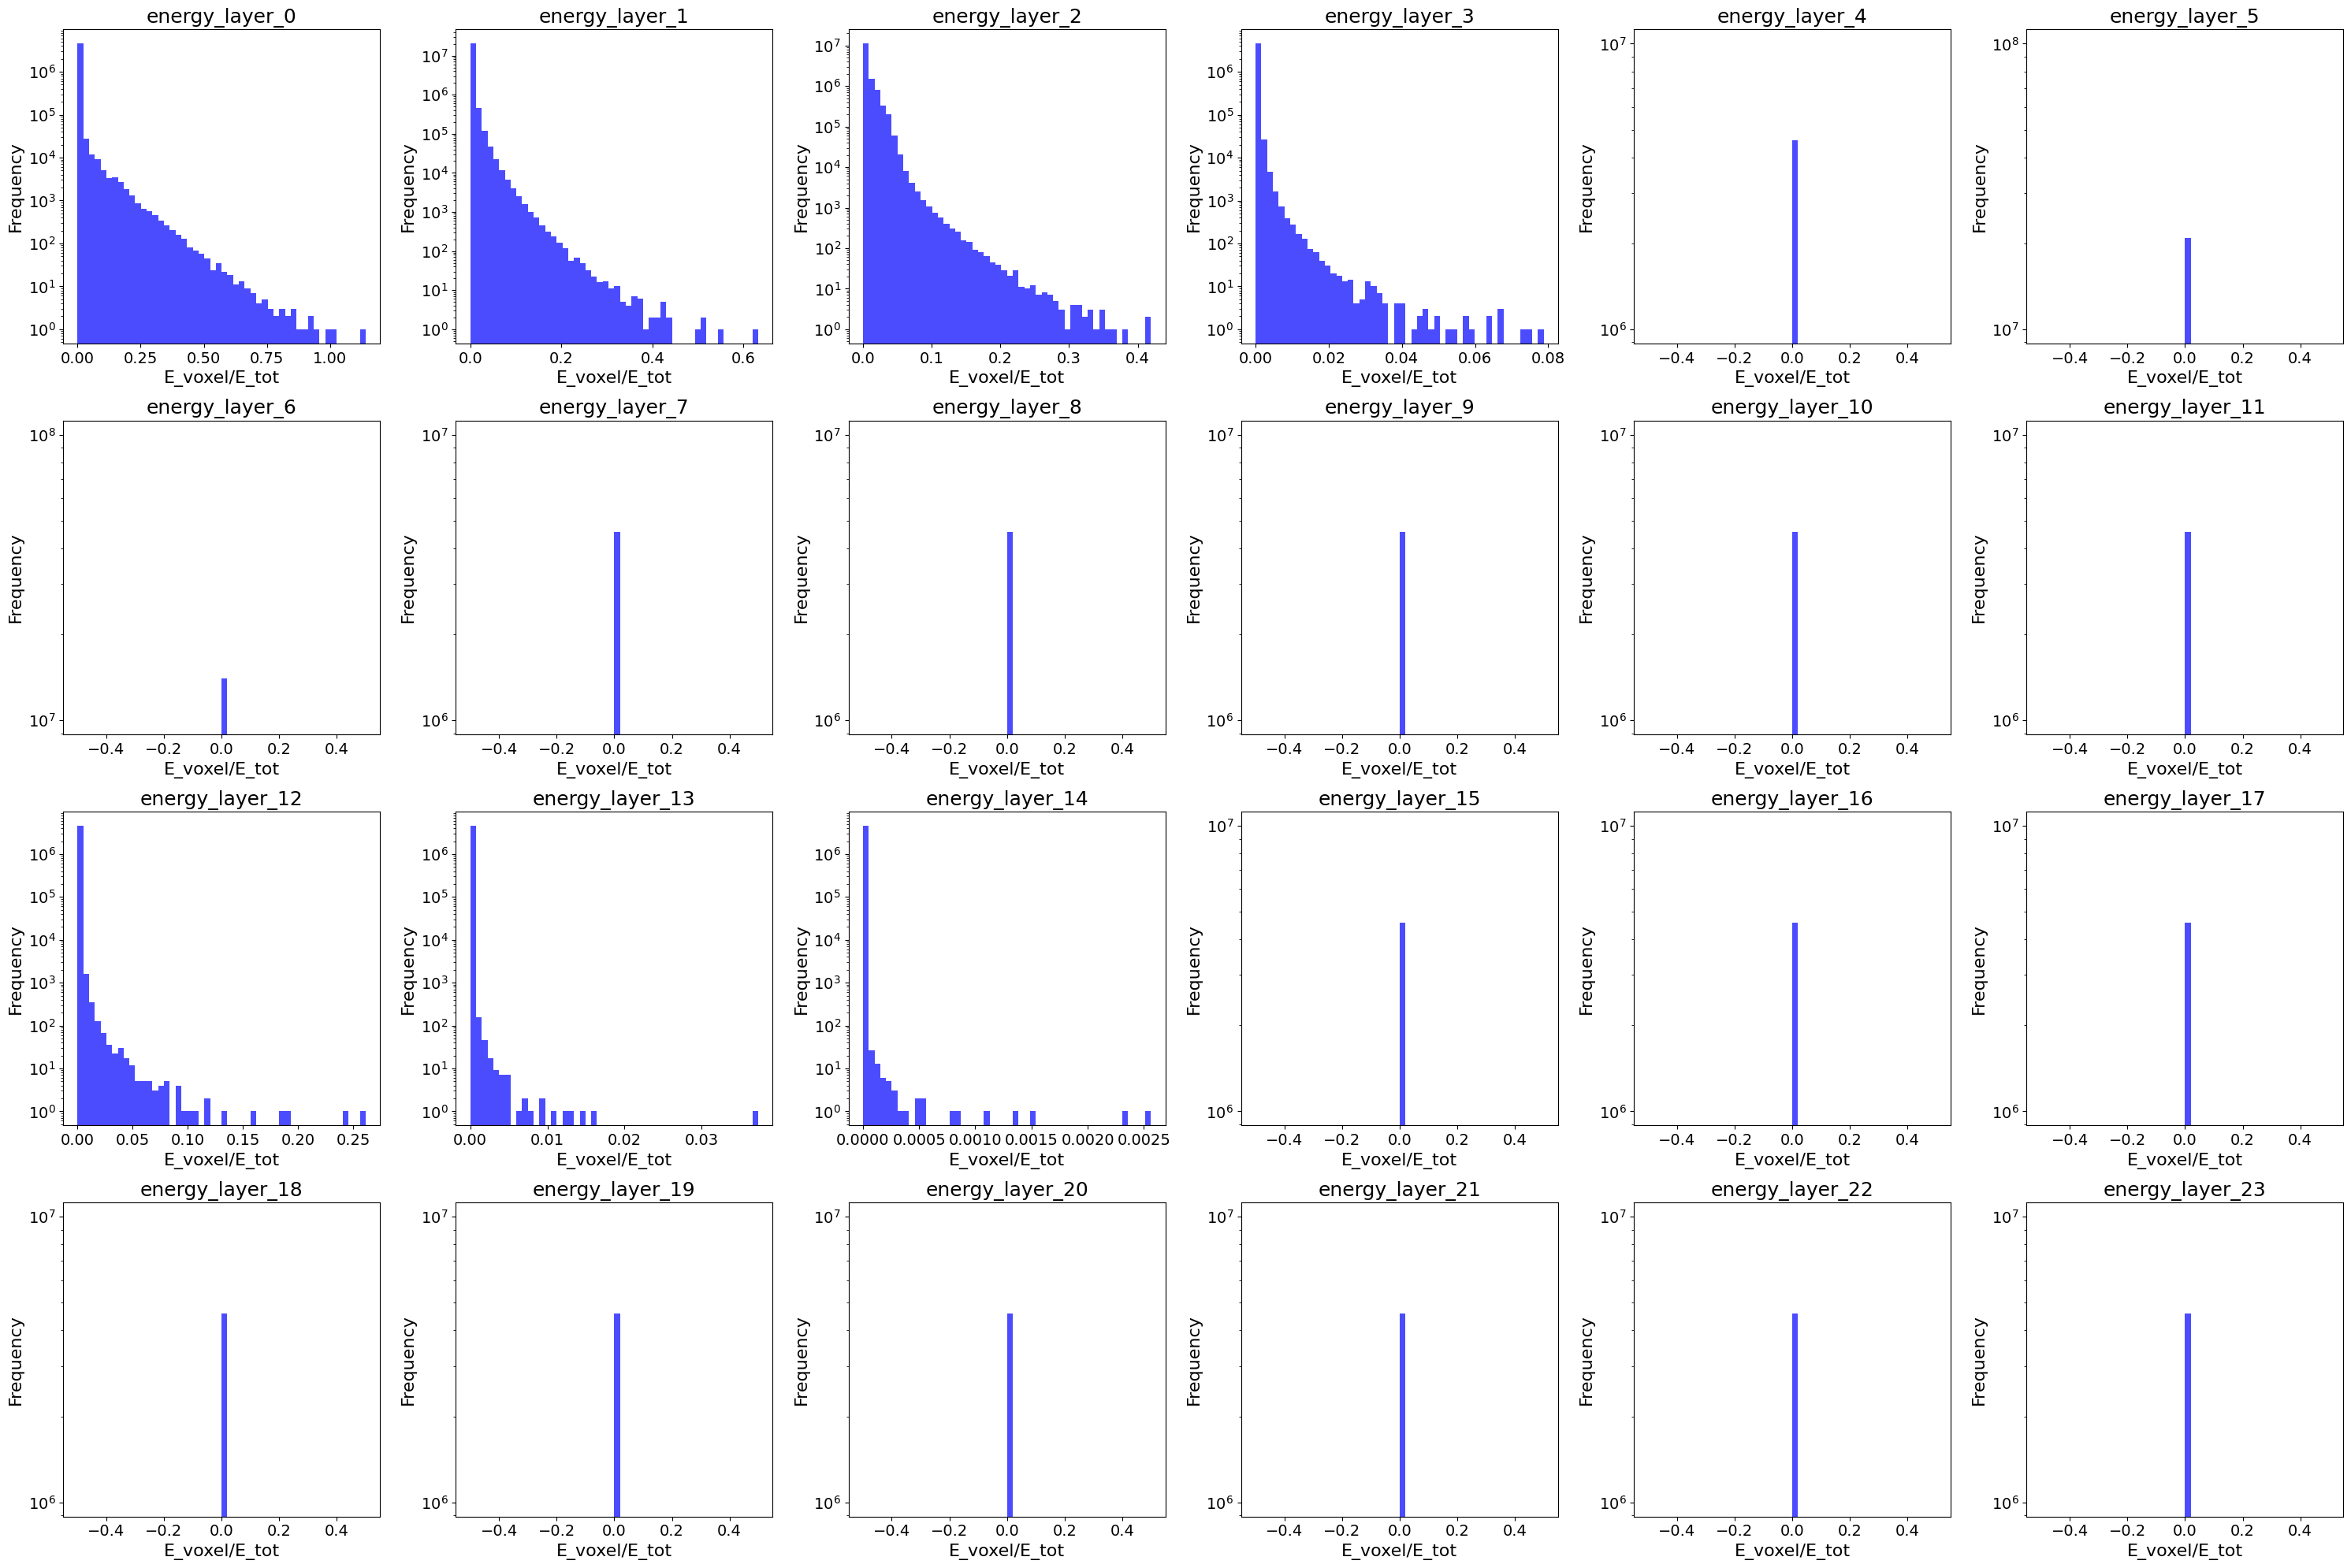

In [6]:
# Create a list of layer indices
layers = list(range(24))

# Create a 4 rows x 6 columns subplot layout
fig, axes = plt.subplots(4, 6, figsize=(30, 20))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the array of subplots for easy iteration

for i, layer in enumerate(layers):
    class_name = f'energy_layer_{layer}'
    
    # Read data from the HDF5 file
    with h5py.File(ATLAS_raw_dir, 'r') as hdf:
        if class_name in hdf:
            showers_data = hdf[class_name][:]
        else:
            print(f"Warning: {class_name} does not exist in the HDF5 file.")
            showers_data = []
    
    # Plot the histogram
    if showers_data.size > 0:
        axes[i].hist(showers_data.flatten(), bins=50, color='blue', alpha=0.7)
        axes[i].set_title(class_name, fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel('E_voxel/E_tot', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Frequency', fontsize=16)  # Set y-axis label font size
    else:
        axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                    verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(class_name, fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel('voxel wise energy', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
    axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed

# Adjust the spacing between subplots to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

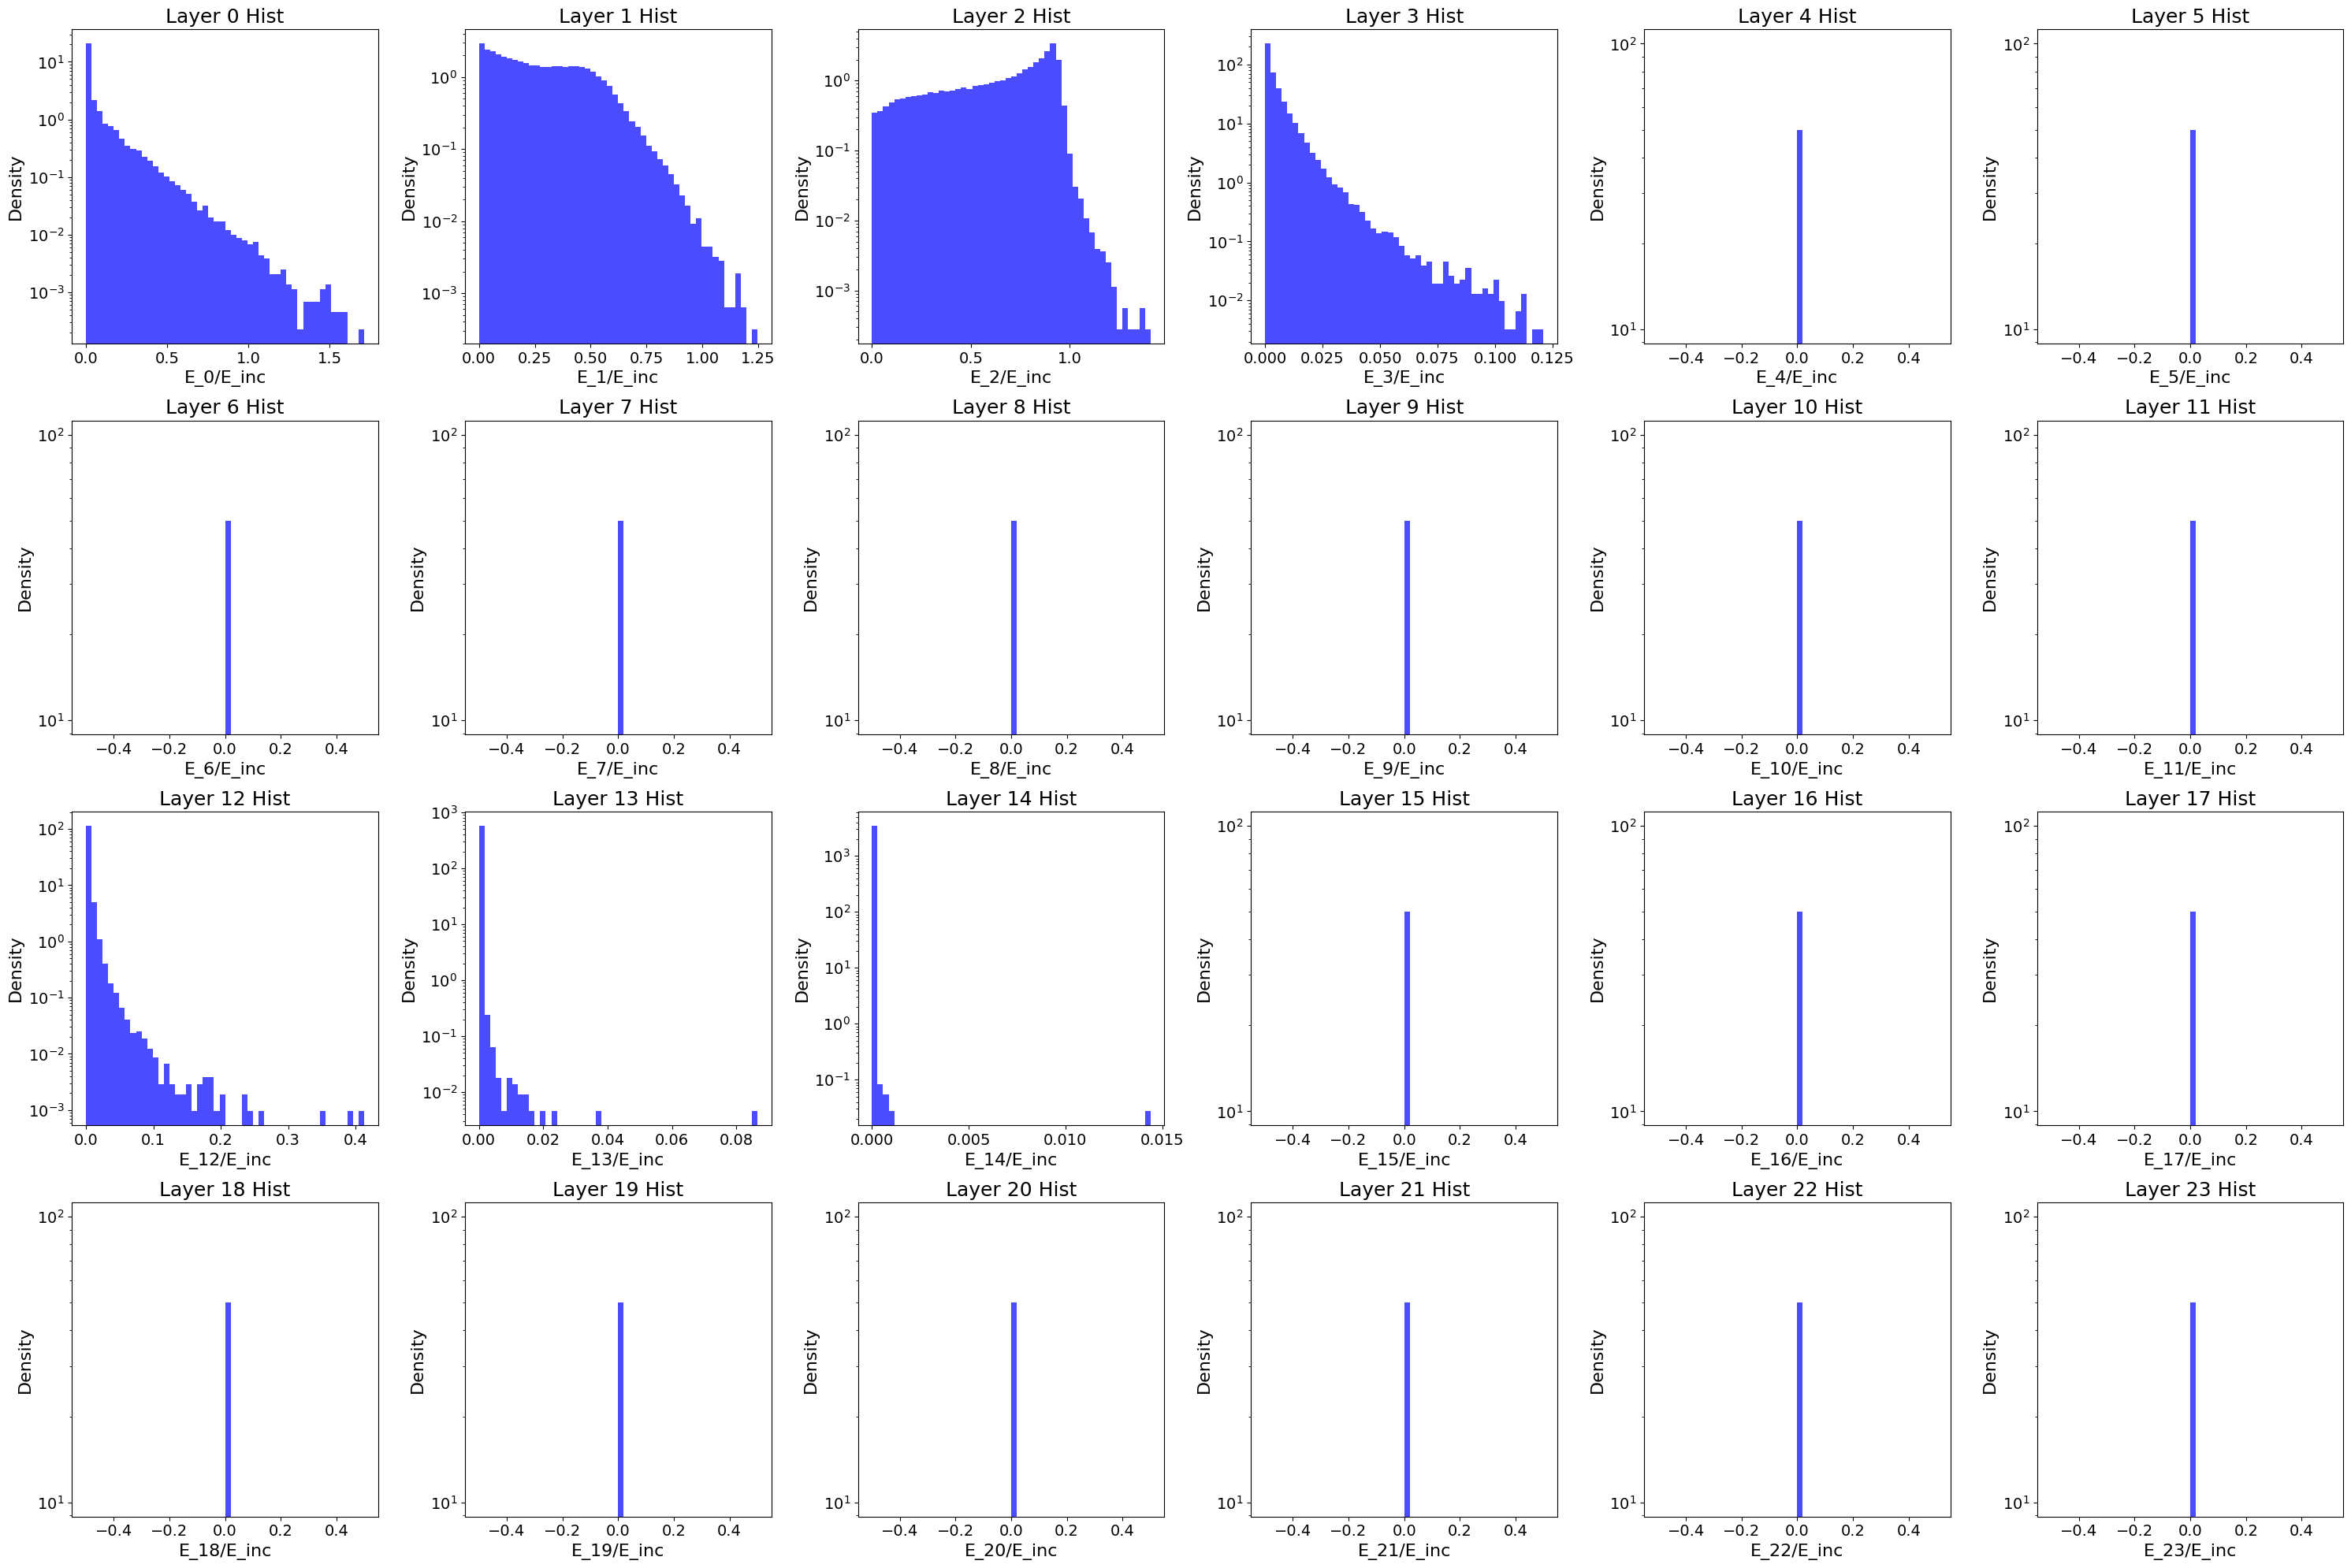

In [7]:
# Create a list of layer indices
layers = list(range(24))

# Create a 4 rows x 6 columns subplot layout
fig, axes = plt.subplots(4, 6, figsize=(30, 20))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the array of subplots for easy iteration

for i, layer in enumerate(layers):
    class_name = f'energy_layer_{layer}'
    
    # Read data from the HDF5 file
    with h5py.File(ATLAS_raw_dir, 'r') as hdf:
        if class_name in hdf:
            showers_data = hdf[class_name][:]
            showers_tensor = torch.tensor(showers_data, dtype=torch.float32)
            event_energy = showers_tensor.sum(dim=1)
        else:
            print(f"Warning: {class_name} does not exist in the HDF5 file.")
            showers_data = []
    
    # Plot the histogram
    if showers_data.size > 0:
        axes[i].hist(event_energy, bins=50, color='blue', alpha=0.7, density=True)
        axes[i].set_title(f'Layer {layer} Hist', fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
    else:
        axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                    verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
        # axes[i].set_title(class_name, fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Frequency', fontsize=16)  # Set y-axis label font size
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
    axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed

# Adjust the spacing between subplots to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

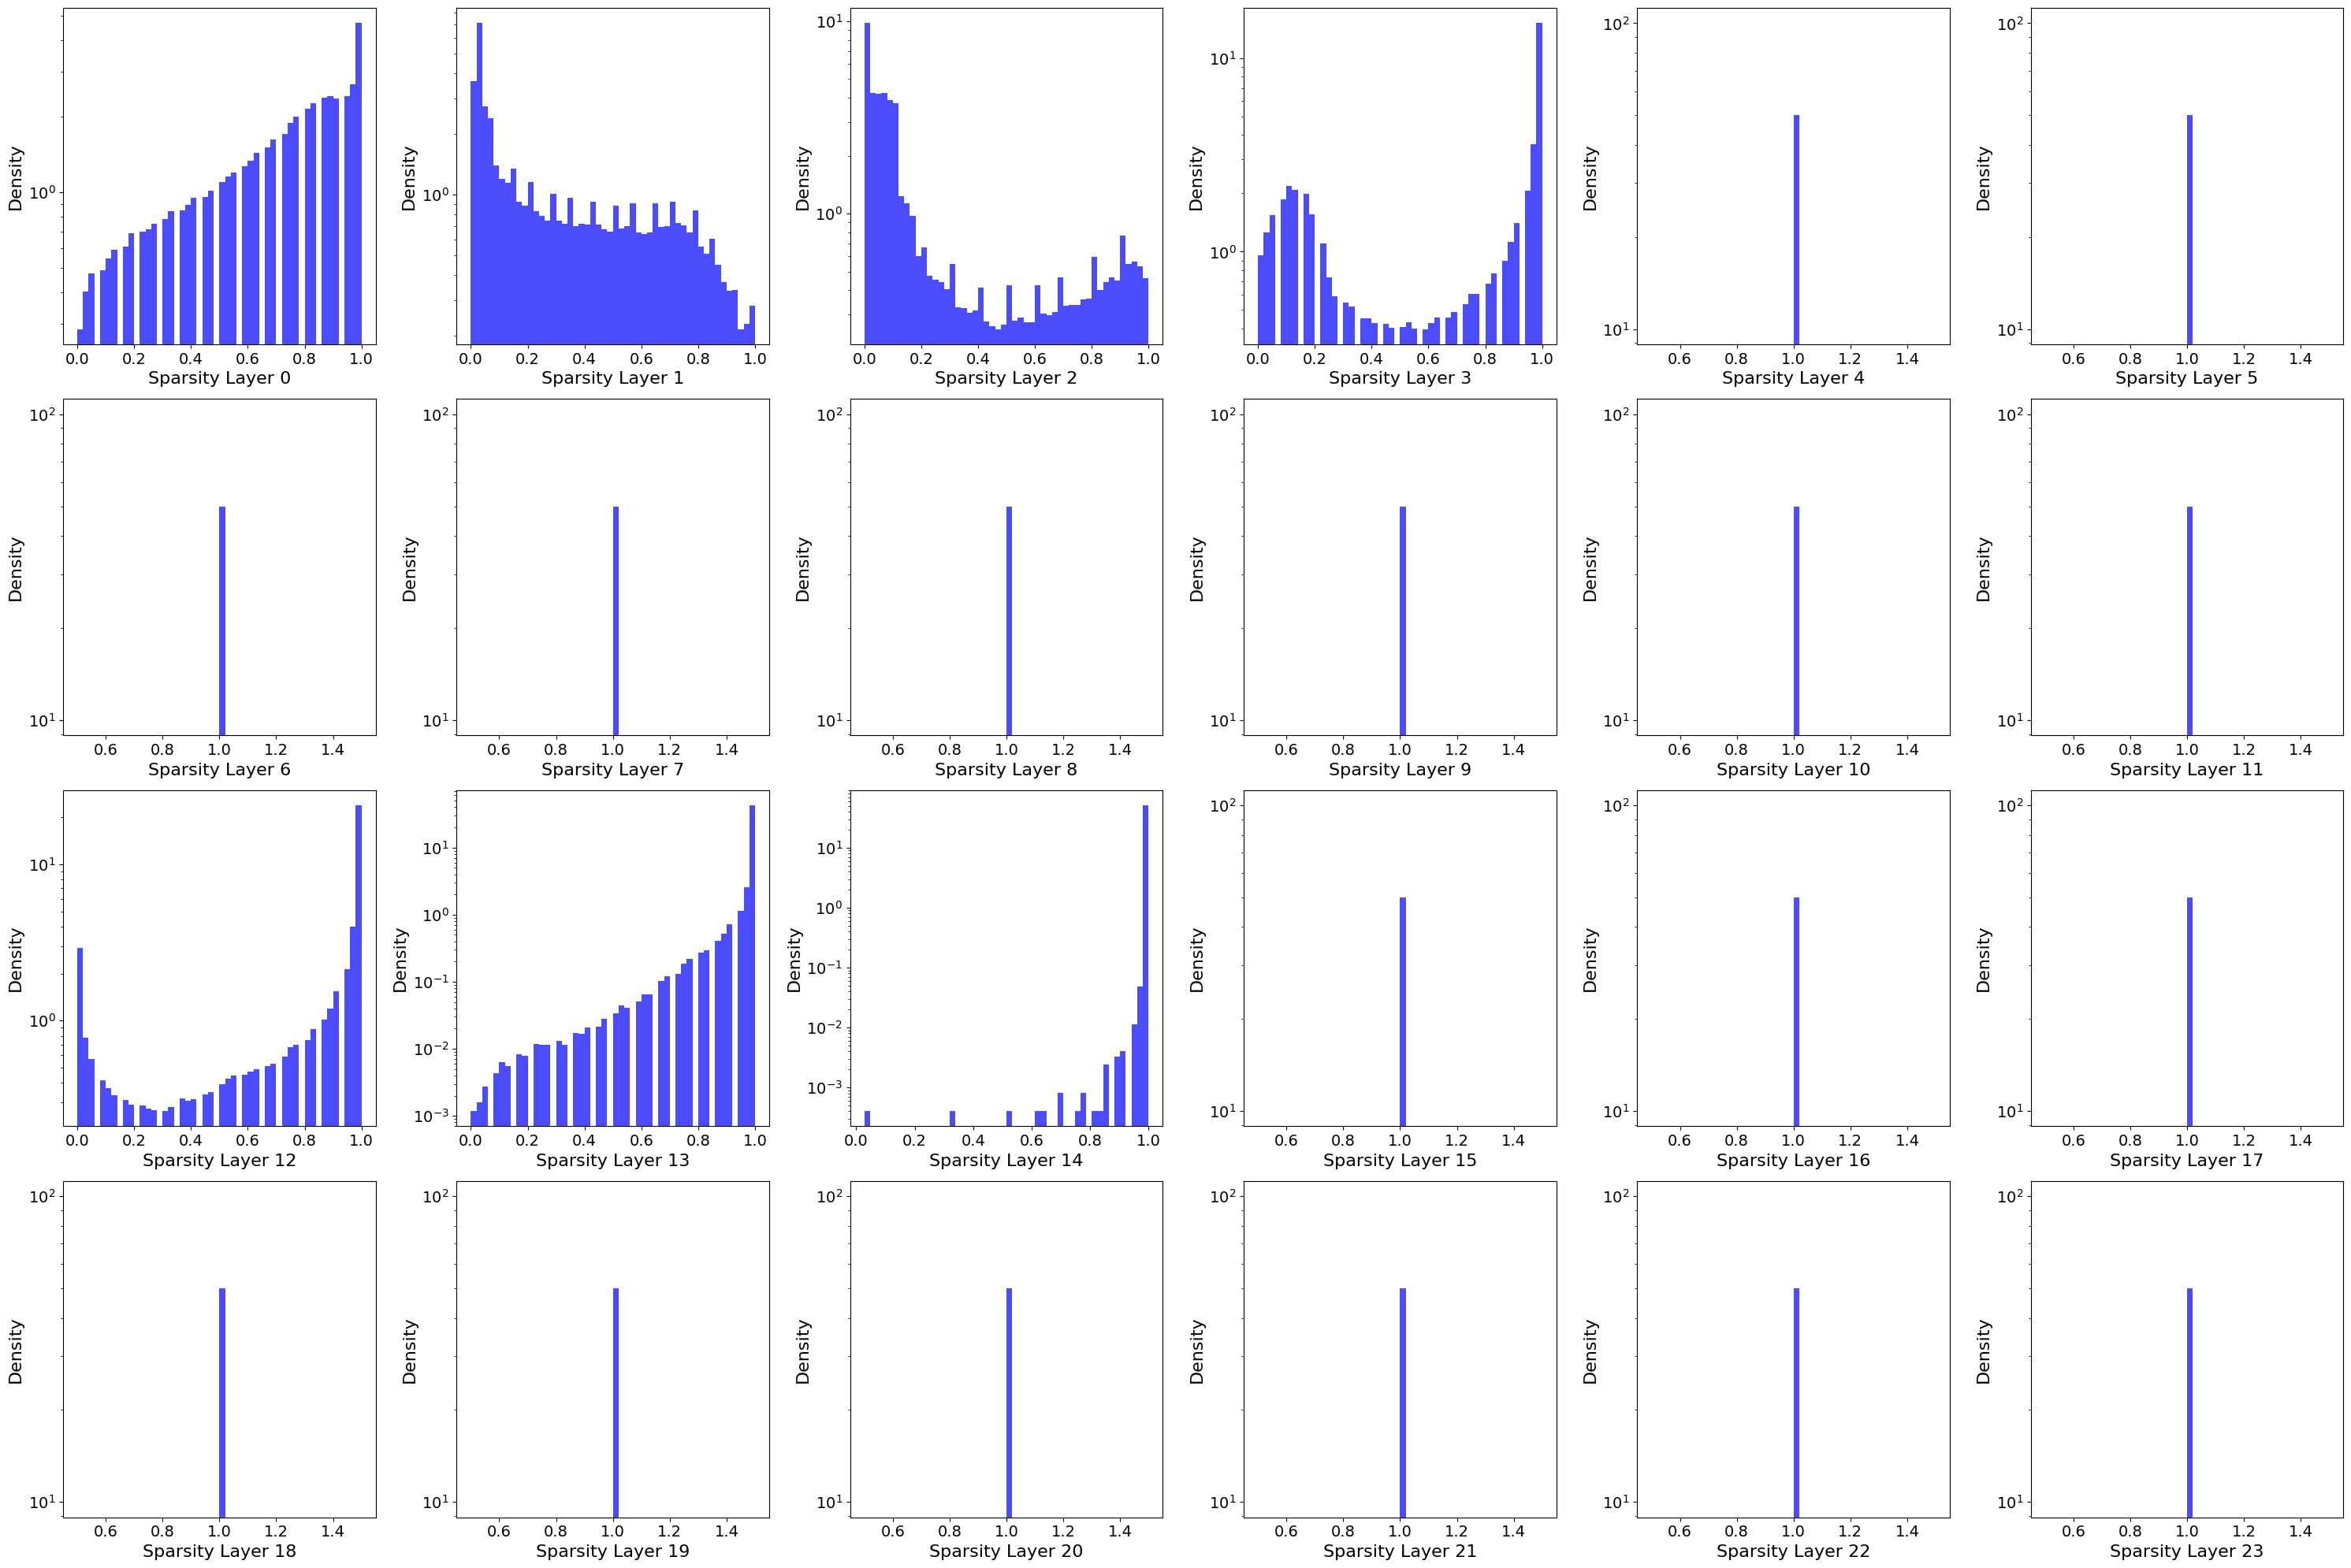

In [8]:
# Create a list of layer indices
layers = list(range(24))

# Create a 4 rows x 6 columns subplot layout
fig, axes = plt.subplots(4, 6, figsize=(30, 20))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the array of subplots for easy iteration

for i, layer in enumerate(layers):
    class_name = f'energy_layer_{layer}'
    
    # Read data from the HDF5 file
    with h5py.File(ATLAS_raw_dir, 'r') as hdf:
        if class_name in hdf:
            showers_data = hdf[class_name][:]
            sparsity_ratio = np.sum(showers_data == 0, axis=1)/showers_data.shape[1]
        else:
            print(f"Warning: {class_name} does not exist in the HDF5 file.")
            showers_data = []
    
    # Plot the histogram
    if showers_data.size > 0:
        axes[i].hist(sparsity_ratio, bins=50, color='blue', alpha=0.7, density=True)
        # axes[i].set_title(f'Sparsity Layer {layer}', fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'Sparsity Layer {layer}', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
    else:
        axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                    verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
        # axes[i].set_title(class_name, fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'Sparsity Layer {layer}', fontsize=18)   # Set x-axis label font size
        axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
    axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed

# Adjust the spacing between subplots to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

In [9]:
with h5py.File(ATLAS_raw_dir, 'r') as hdf:
    energy_info_0 = hdf["energy_layer_0"][:]
    energy_info_1 = hdf["energy_layer_1"][:]
    energy_info_2 = hdf["energy_layer_2"][:]
    energy_info_3 = hdf["energy_layer_3"][:]
    energy_info_4 = hdf["energy_layer_12"][:]
    energy_info_5 = hdf["energy_layer_13"][:]
    energy_info_6 = hdf["energy_layer_14"][:]
    incident_energy_info = hdf["incident_energy"][:]
    binsize_alpha_info = hdf["binsize_alpha_layer_0"][:]
    binstart_alpha_info = hdf["binstart_alpha_layer_0"][:]
    binsize_radius_info = hdf["binsize_radius_layer_0"][:]
    binstart_radius_info = hdf["binstart_radius_layer_0"][:]
    phi_mod_info = hdf["phi_mod"][:]
    eta_mod_info = hdf["eta_mod"][:]



In [15]:
sumed_energy_ratio = energy_info_0.sum(axis=(1)) + energy_info_1.sum(axis=(1)) + energy_info_2.sum(axis=(1)) + energy_info_3.sum(axis=(1)) + energy_info_4.sum(axis=(1)) + energy_info_5.sum(axis=(1)) + energy_info_6.sum(axis=(1))

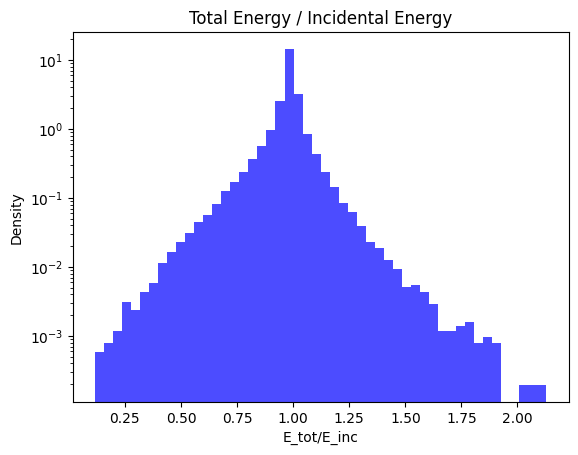

In [16]:
sumed_energy_ratio = torch.tensor(sumed_energy_ratio, dtype=torch.float32)
plt.hist(sumed_energy_ratio, bins=50, color='blue', alpha=0.7, density=True)
plt.title('Total Energy / Incidental Energy')
plt.yscale('log')
plt.xlabel('E_tot/E_inc')
plt.ylabel('Density')
plt.show()

In [19]:
unique_inc_E = np.unique(incident_energy_info)

In [28]:
peak_where_dict = {}
for i, peak in enumerate(unique_inc_E):
    peak_where = np.where(incident_energy_info == peak)
    peak_data = incident_energy_info[incident_energy_info == peak]
    peak_where_dict[peak] = peak_where
    print(f'Incident Energy: {peak}, Count: {peak_data.shape[0]}')

Incident Energy: 256.0, Count: 10000
Incident Energy: 512.0, Count: 10000
Incident Energy: 1024.0, Count: 10000
Incident Energy: 2048.0, Count: 10000
Incident Energy: 4096.0, Count: 10000
Incident Energy: 8192.0, Count: 10000
Incident Energy: 16384.0, Count: 10000
Incident Energy: 32768.0, Count: 9999
Incident Energy: 65536.0, Count: 9996
Incident Energy: 131072.0, Count: 9990
Incident Energy: 262144.0, Count: 9984
Incident Energy: 524288.0, Count: 4970
Incident Energy: 1048576.0, Count: 4992
Incident Energy: 2097152.0, Count: 4844
Incident Energy: 4194304.0, Count: 2496


In [47]:
peak_where_dict

{256.0: (array([   0,    1,    2, ..., 9997, 9998, 9999]),),
 512.0: (array([10000, 10001, 10002, ..., 19997, 19998, 19999]),),
 1024.0: (array([20000, 20001, 20002, ..., 29997, 29998, 29999]),),
 2048.0: (array([30000, 30001, 30002, ..., 39997, 39998, 39999]),),
 4096.0: (array([40000, 40001, 40002, ..., 49997, 49998, 49999]),),
 8192.0: (array([50000, 50001, 50002, ..., 59997, 59998, 59999]),),
 16384.0: (array([60000, 60001, 60002, ..., 69997, 69998, 69999]),),
 32768.0: (array([70000, 70001, 70002, ..., 79996, 79997, 79998]),),
 65536.0: (array([79999, 80000, 80001, ..., 89992, 89993, 89994]),),
 131072.0: (array([89995, 89996, 89997, ..., 99982, 99983, 99984]),),
 262144.0: (array([ 99985,  99986,  99987, ..., 109966, 109967, 109968]),),
 524288.0: (array([109969, 109970, 109971, ..., 114936, 114937, 114938]),),
 1048576.0: (array([114939, 114940, 114941, ..., 119928, 119929, 119930]),),
 2097152.0: (array([119931, 119932, 119933, ..., 124772, 124773, 124774]),),
 4194304.0: (arra

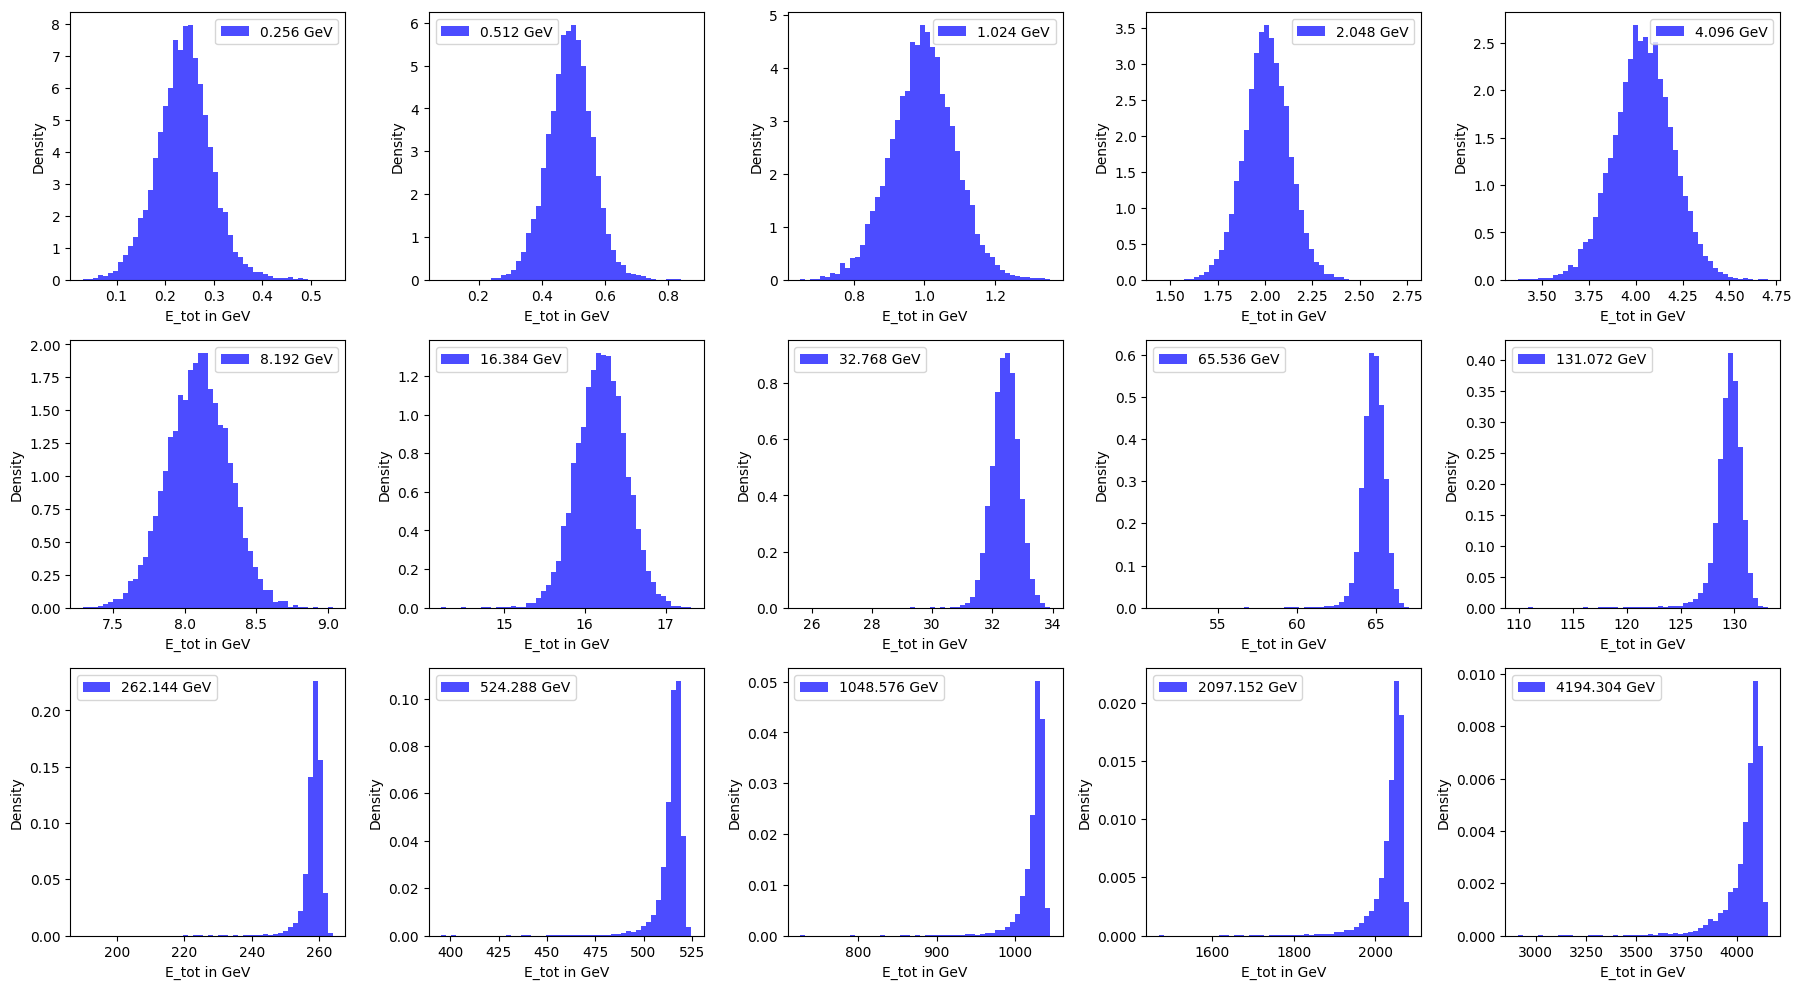

In [46]:
sumed_energy = sumed_energy_ratio * incident_energy_info

# 创建5行3列的子图
fig, axes = plt.subplots(3, 5, figsize=(18, 10))  # 可以根据需要调整figsize
axes = axes.flatten()  # 将二维数组展平成一维，方便迭代

for ax, input_E in zip(axes, unique_inc_E):
    energy_subset = peak_where_dict[input_E]
    ax.hist(sumed_energy[energy_subset]/1000, bins=50, color='blue', alpha=0.7, density=True, label=f'{input_E/1000} GeV')
    # ax.set_title('Total Energy')
    # 如果需要对y轴使用对数刻度，可以取消下面一行的注释
    # ax.set_yscale('log')
    ax.set_xlabel('E_tot in GeV')
    ax.set_ylabel('Density')
    ax.legend()

# 如果unique_inc_E少于15个，可以隐藏多余的子图
for ax in axes[len(unique_inc_E):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

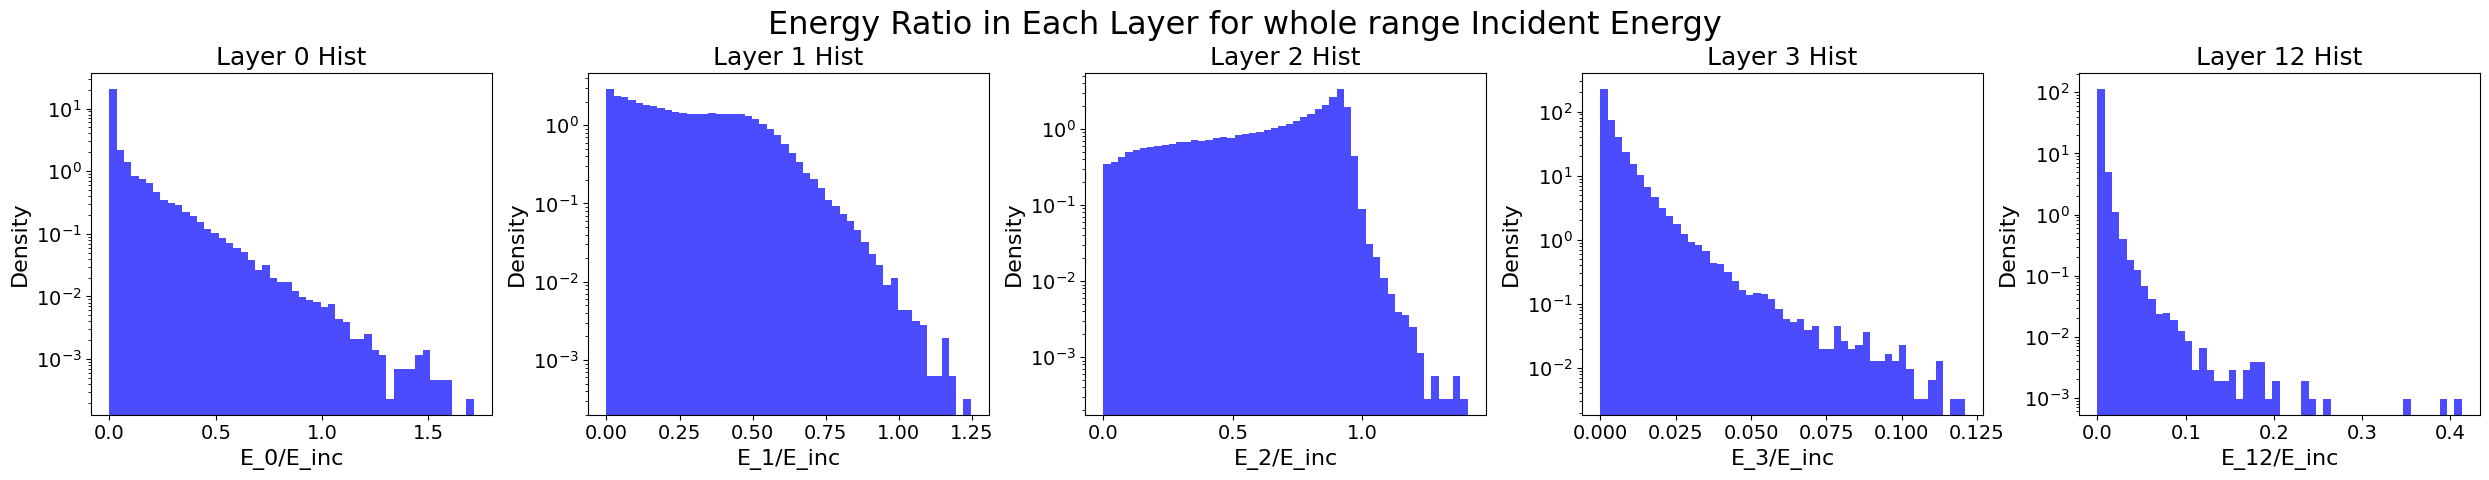

In [84]:
layers = [0, 1, 2, 3, 12]

# Create a 4 rows x 6 columns subplot layout
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()  # Flatten the array of subplots for easy iteration

for i, layer in enumerate(layers):
    class_name = f'energy_layer_{layer}'
    
    # Read data from the HDF5 file
    with h5py.File(ATLAS_raw_dir, 'r') as hdf:
        if class_name in hdf:
            showers_data = hdf[class_name][:]
            showers_tensor = torch.tensor(showers_data, dtype=torch.float32)
            event_energy = showers_tensor.sum(dim=1)
        else:
            print(f"Warning: {class_name} does not exist in the HDF5 file.")
            showers_data = []
    
    # Plot the histogram
    if showers_data.size > 0:
        axes[i].hist(event_energy, bins=50, color='blue', alpha=0.7, density=True)
        axes[i].set_title(f'Layer {layer} Hist', fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
    else:
        axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                    verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
        # axes[i].set_title(class_name, fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Frequency', fontsize=16)  # Set y-axis label font size
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
    axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed
fig.suptitle(f'Energy Ratio in Each Layer for whole range Incident Energy', fontsize=23, y=0.95)
# Adjust the spacing between subplots to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

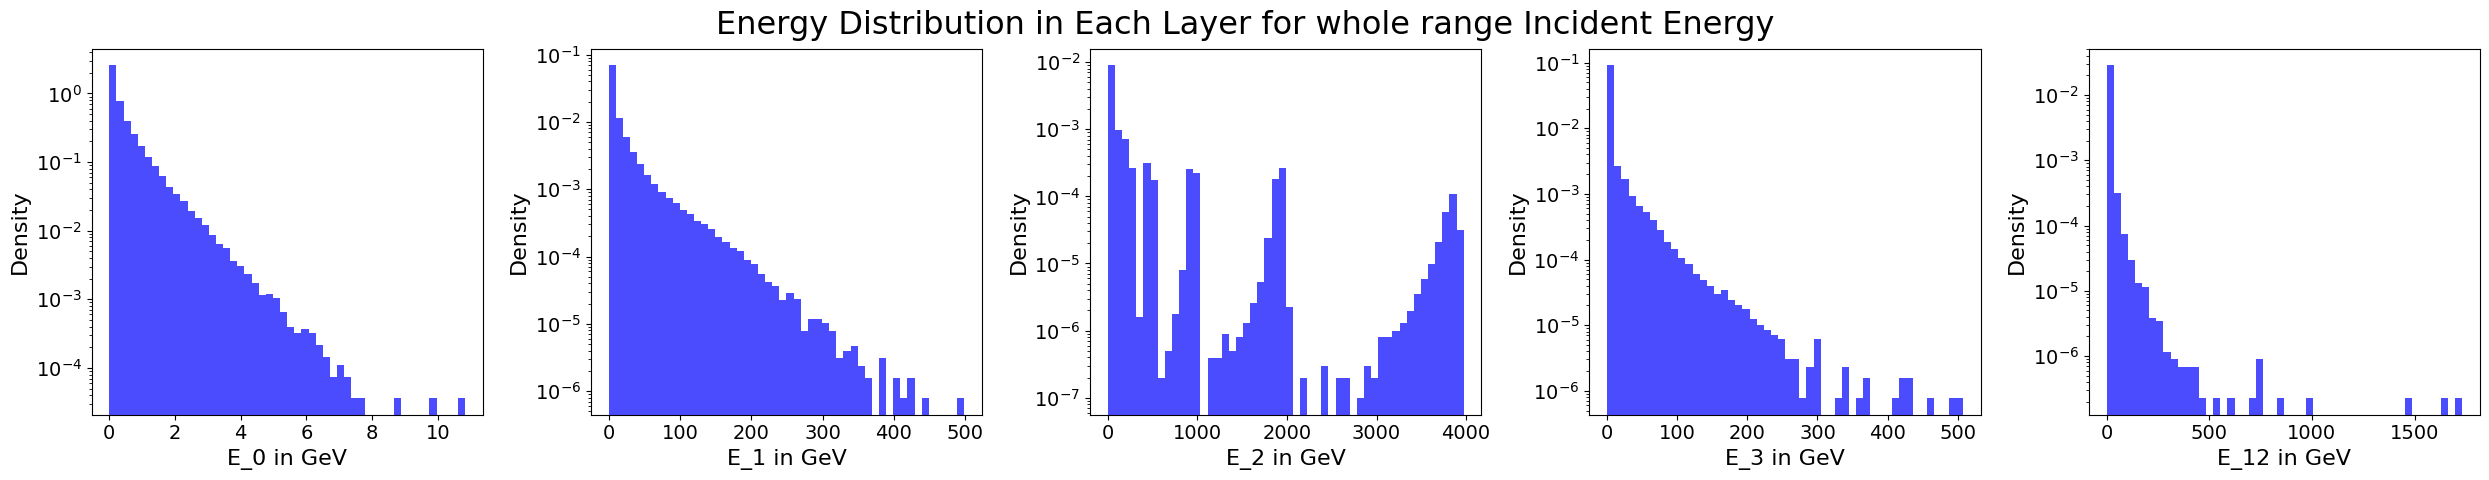

In [82]:
# Create a list of layer indices
layers = [0, 1, 2, 3, 12]

# Create a 4 rows x 6 columns subplot layout
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.flatten()  # Flatten the array of subplots for easy iteration

for i, layer in enumerate(layers):
    class_name = f'energy_layer_{layer}'
    
    # Read data from the HDF5 file
    with h5py.File(ATLAS_raw_dir, 'r') as hdf:
        if class_name in hdf:
            showers_data = hdf[class_name][:]
            showers_tensor = torch.tensor(showers_data, dtype=torch.float32)
            event_energy = showers_tensor.sum(dim=1) * incident_energy_info /1000
        else:
            print(f"Warning: {class_name} does not exist in the HDF5 file.")
            showers_data = []
    
    # Plot the histogram
    if showers_data.size > 0:
        axes[i].hist(event_energy, bins=50, color='blue', alpha=0.7, density=True)
        # axes[i].set_title(f'Layer {layer} Energy Hist', fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'E_{layer} in GeV', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
    else:
        axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                    verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
        # axes[i].set_title(class_name, fontsize=18)  # Set title font size
        axes[i].set_yscale('log')
        axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
        axes[i].set_ylabel('Frequency', fontsize=16)  # Set y-axis label font size
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
    axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed

# Adjust the spacing between subplots to prevent overlap

fig.suptitle(f'Energy Distribution in Each Layer for whole range Incident Energy', fontsize=23, y=0.95)
plt.tight_layout()
# Display the figure
plt.show()

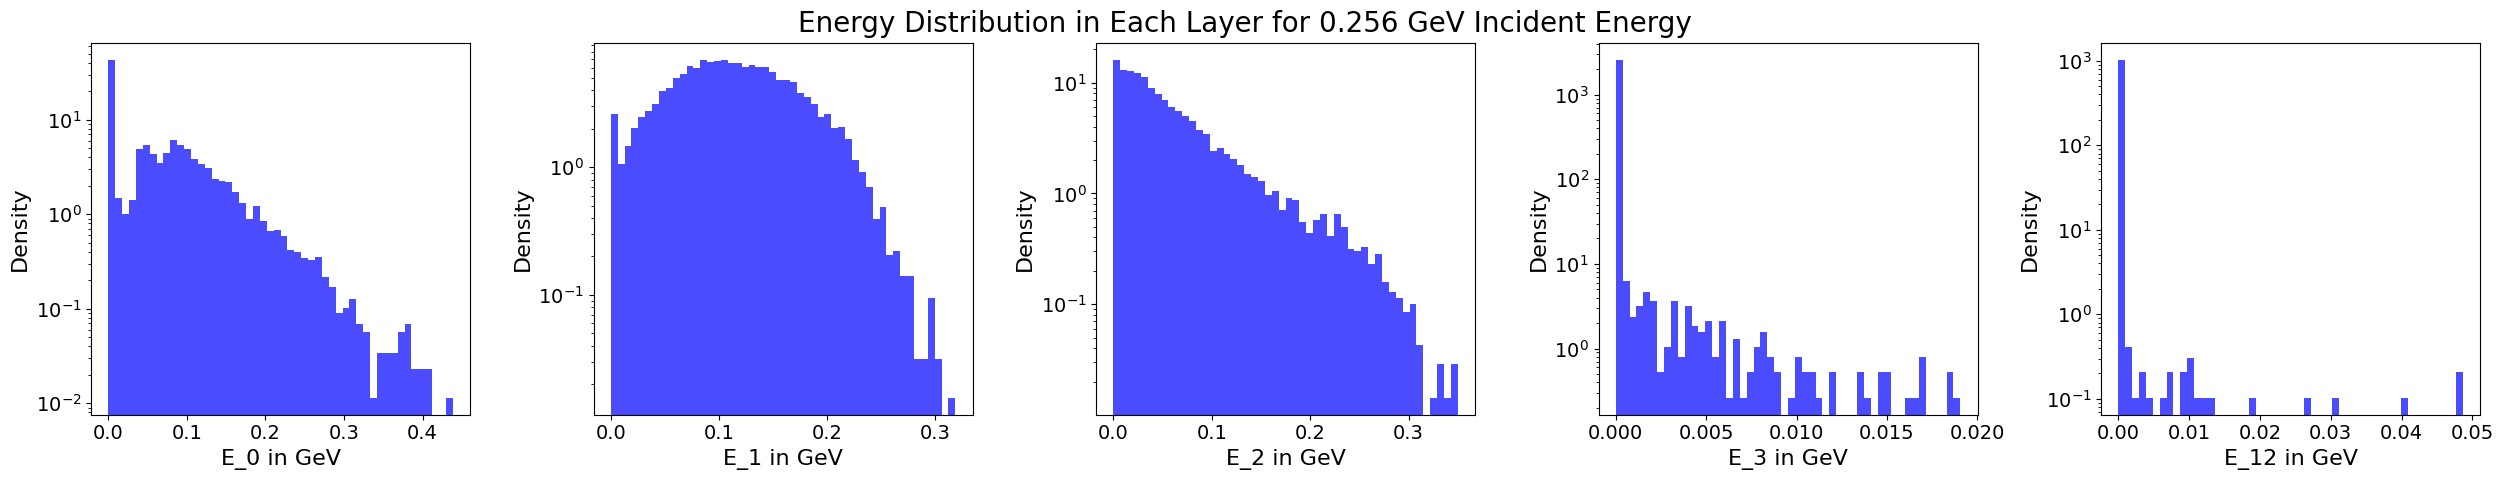

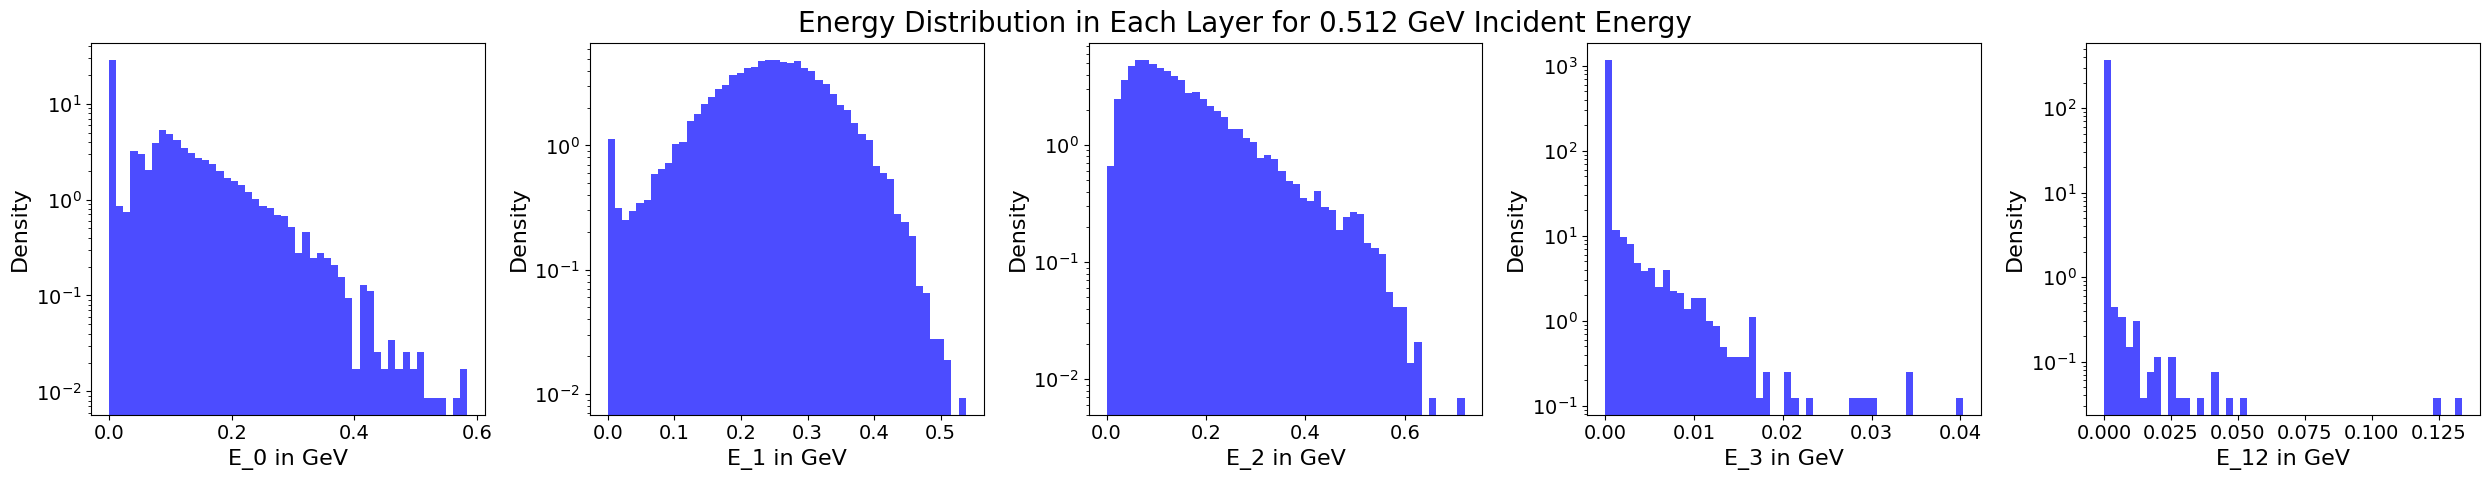

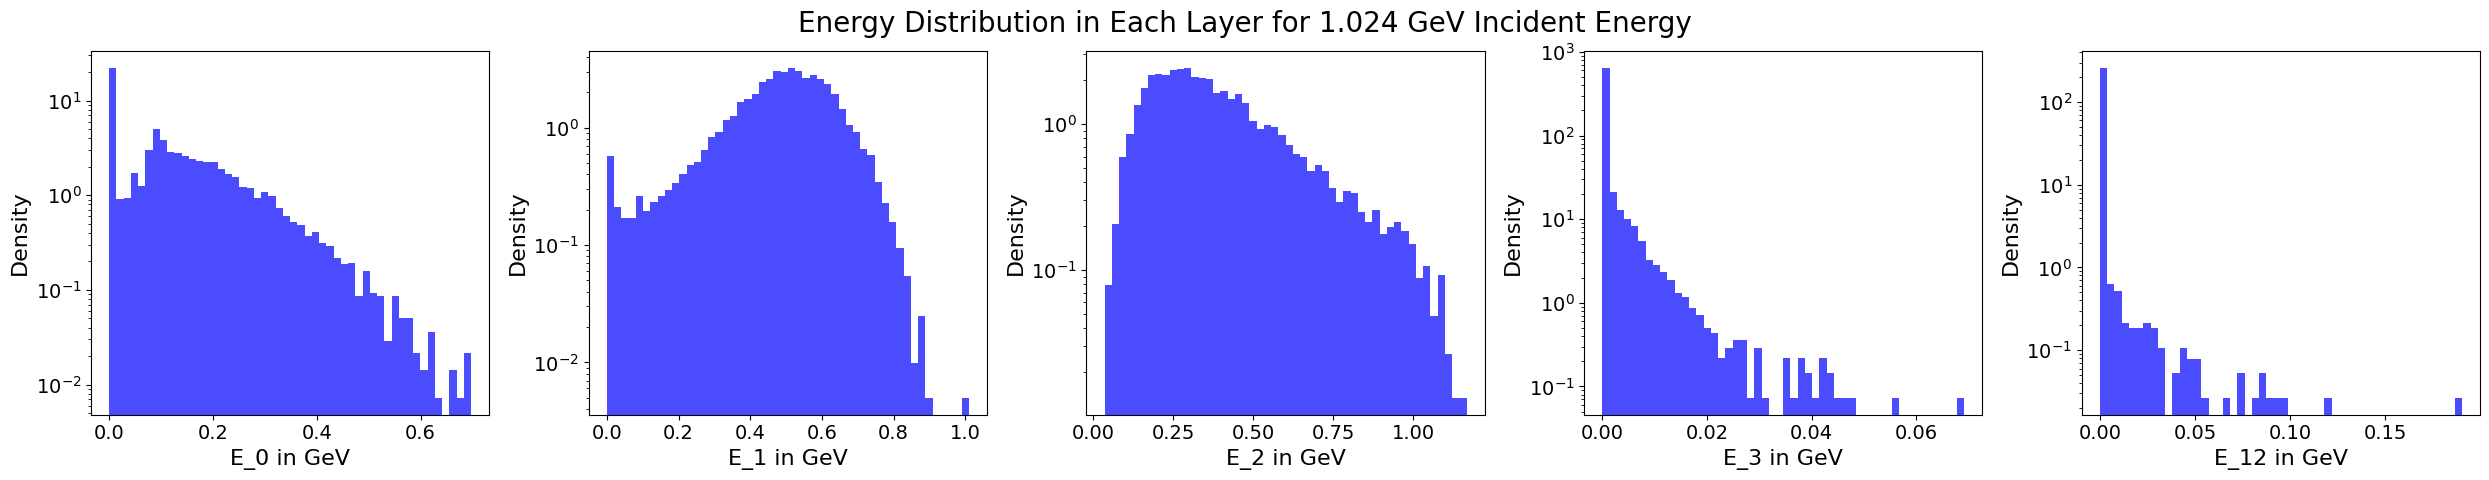

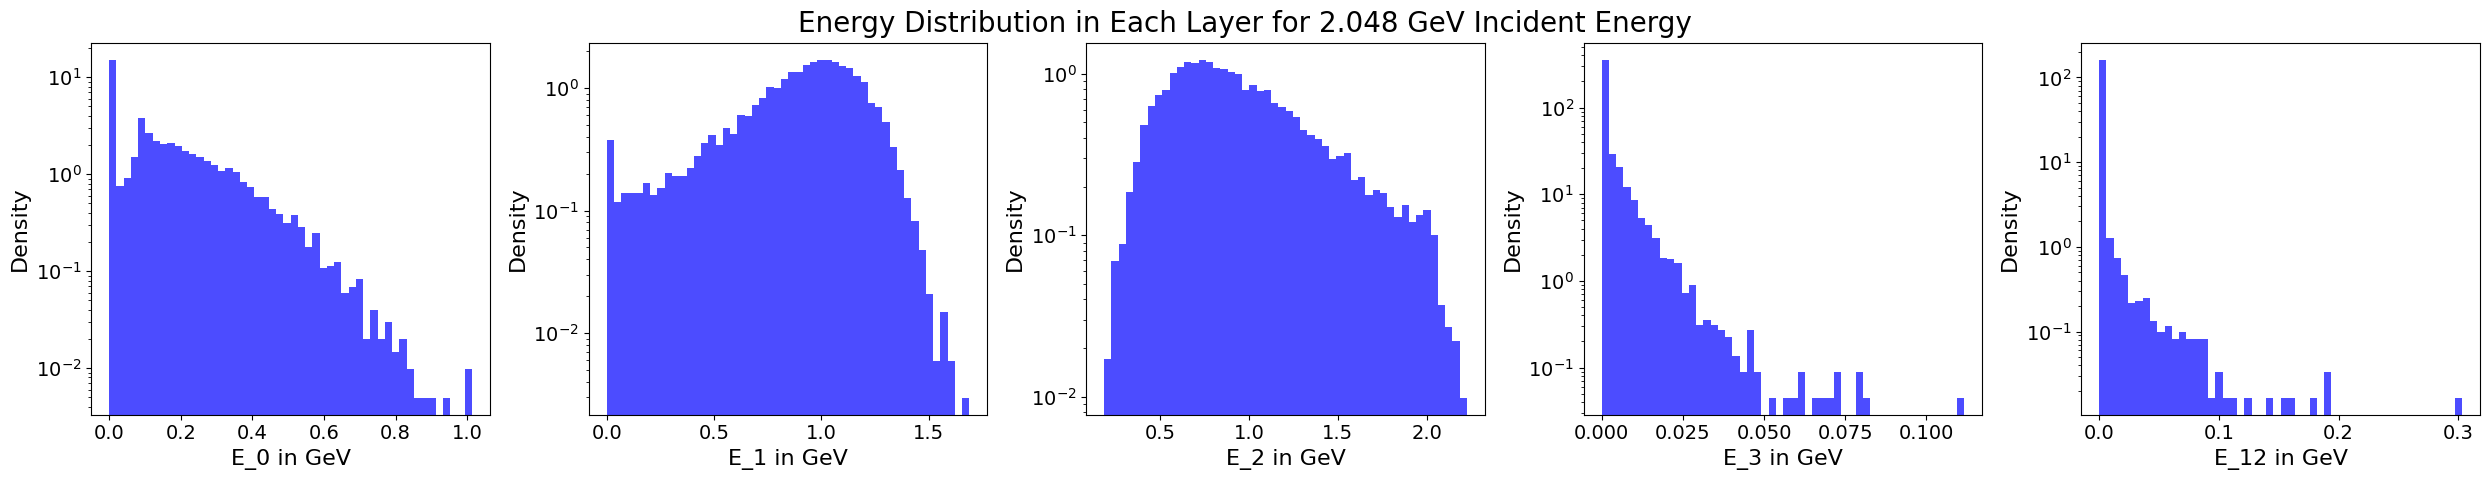

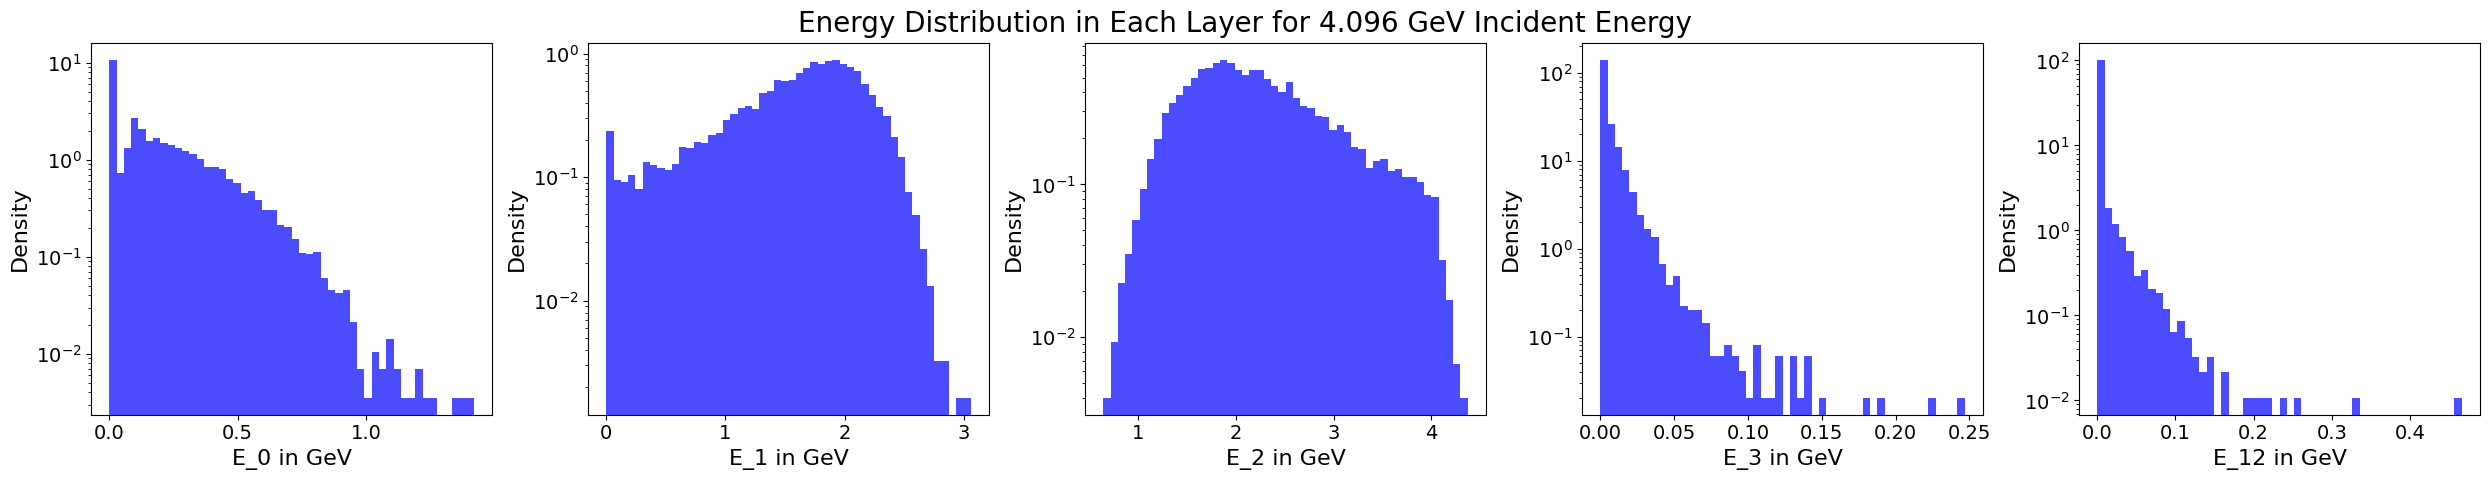

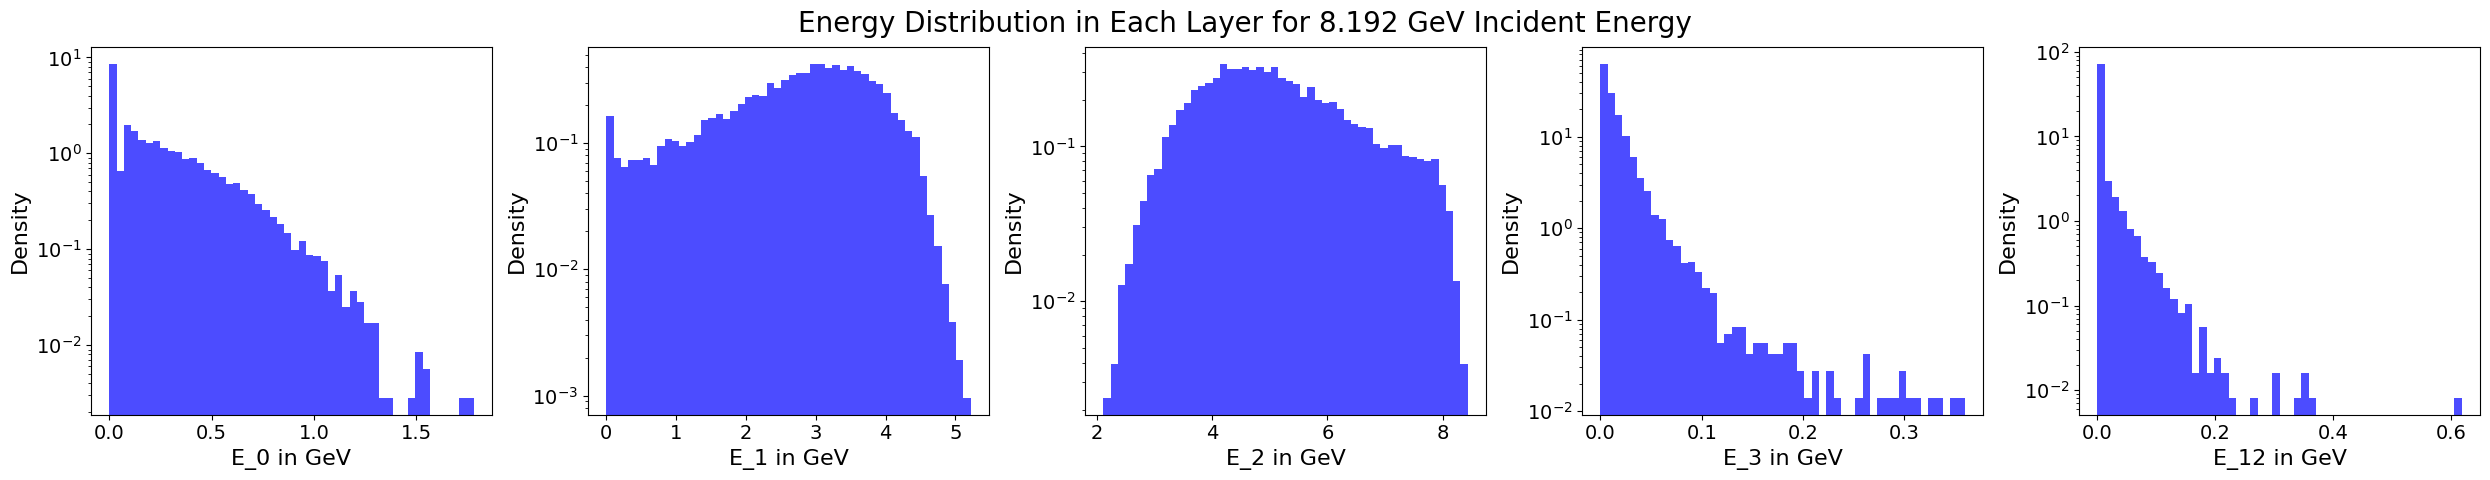

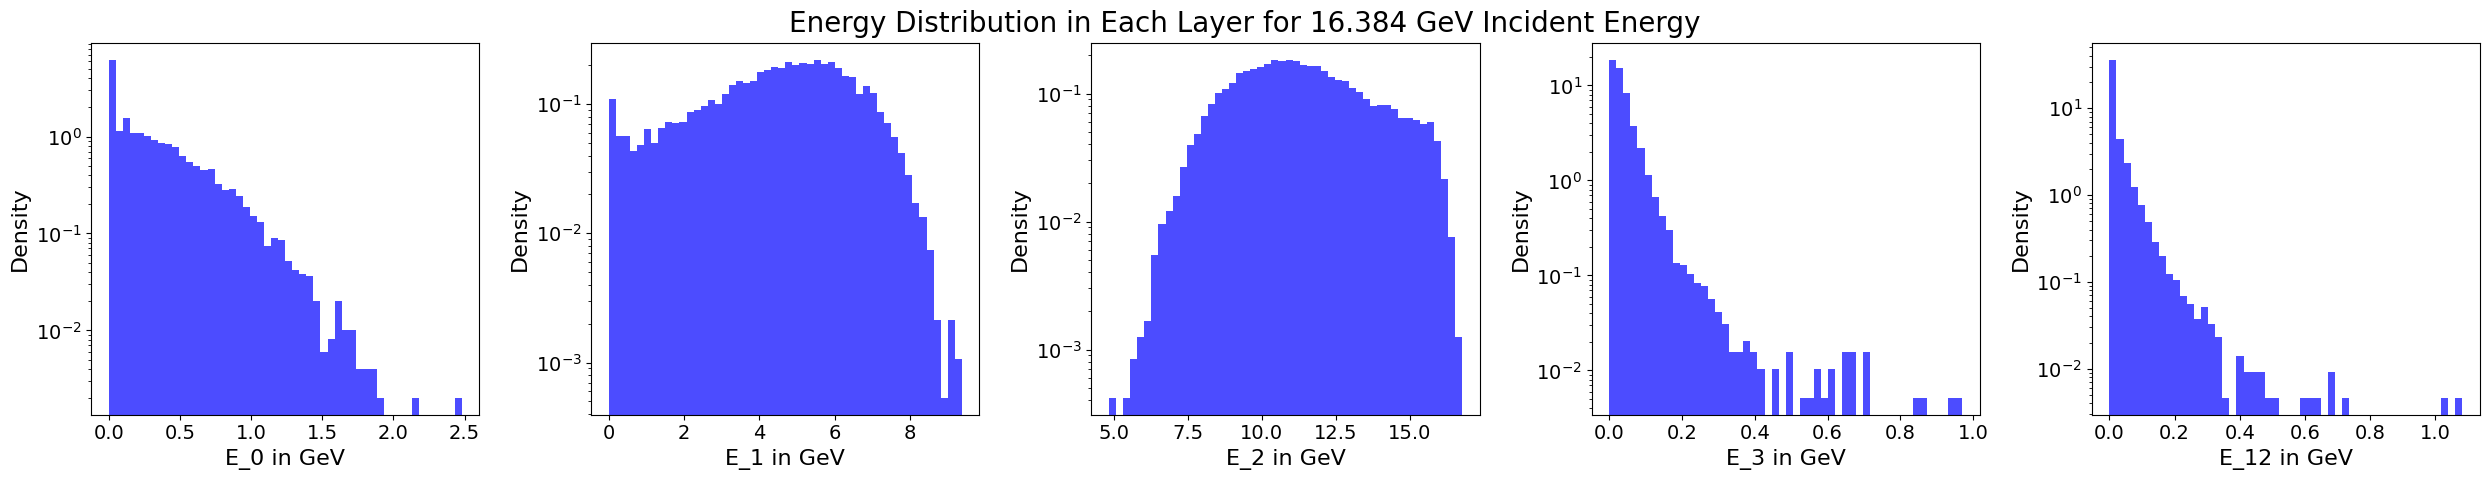

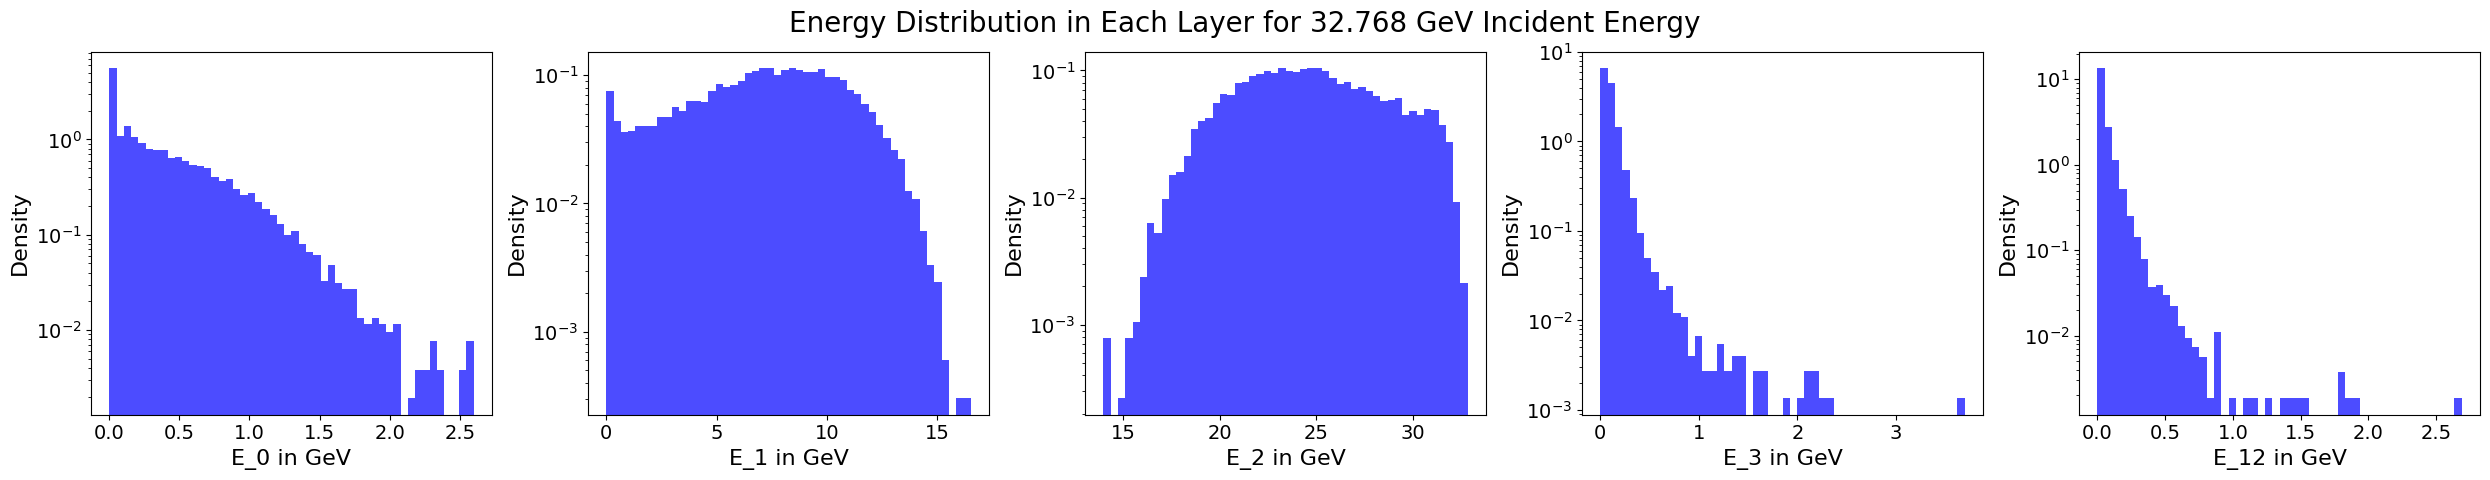

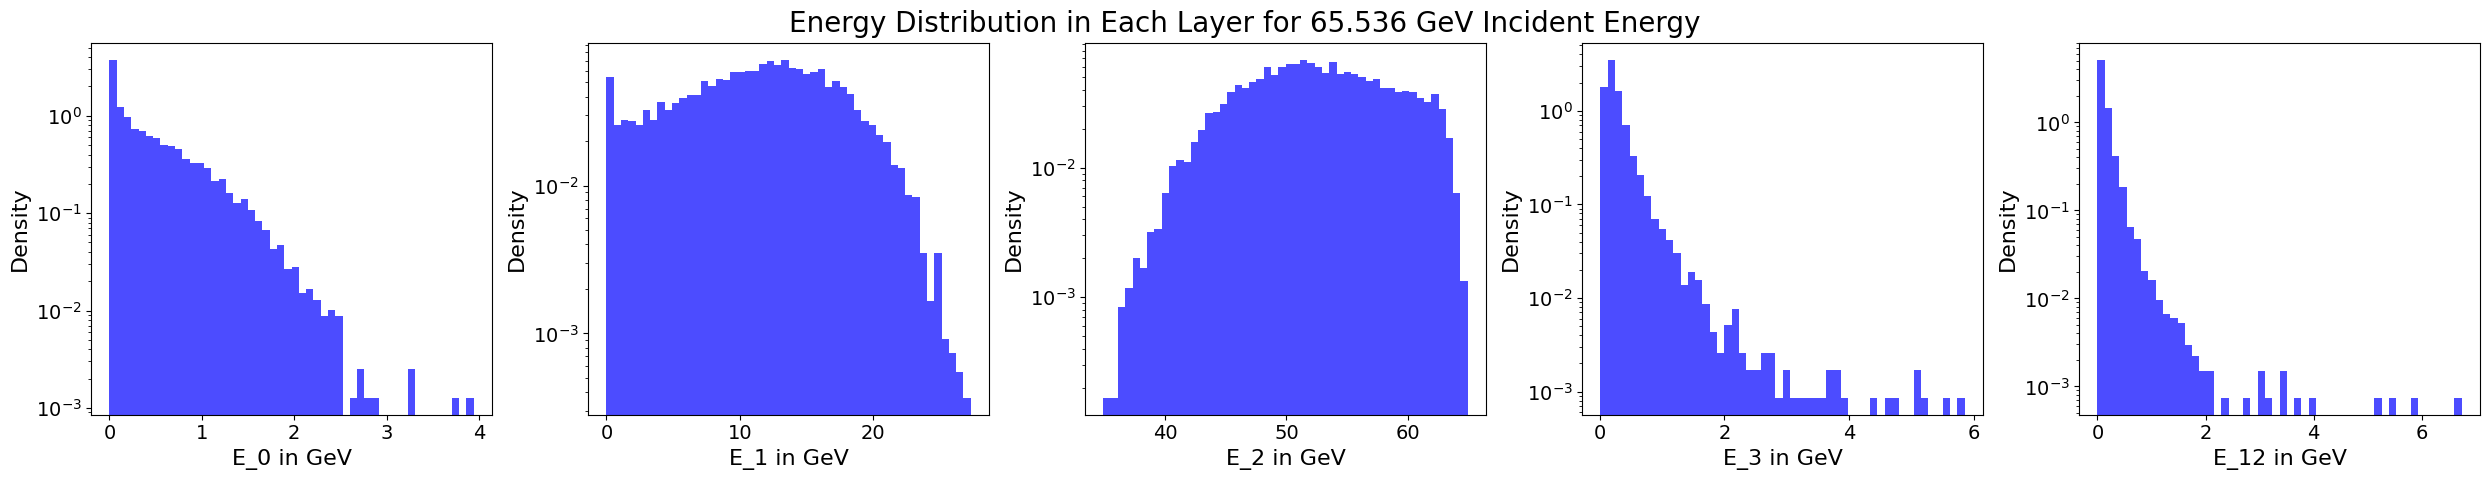

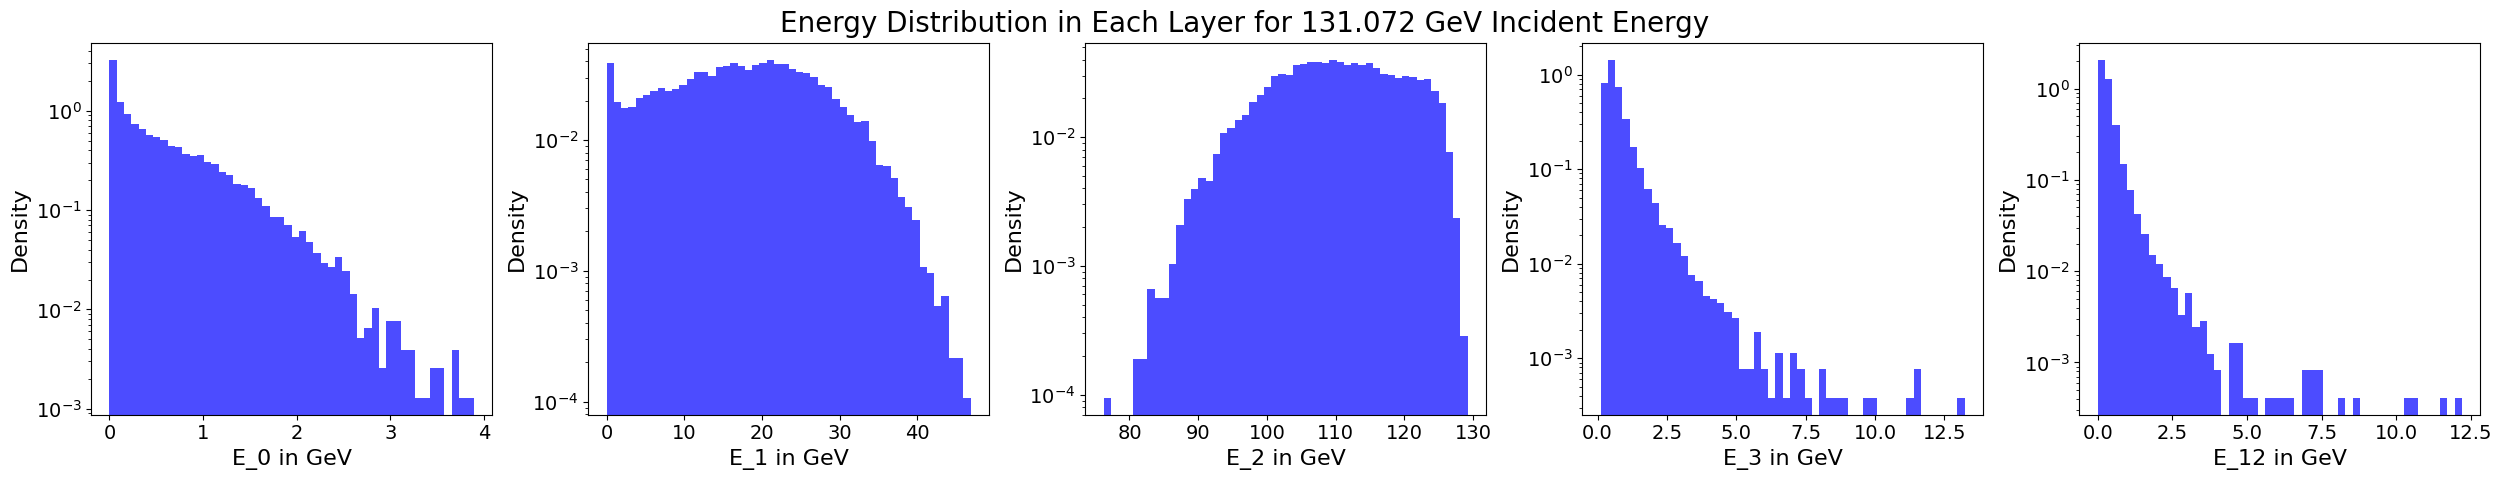

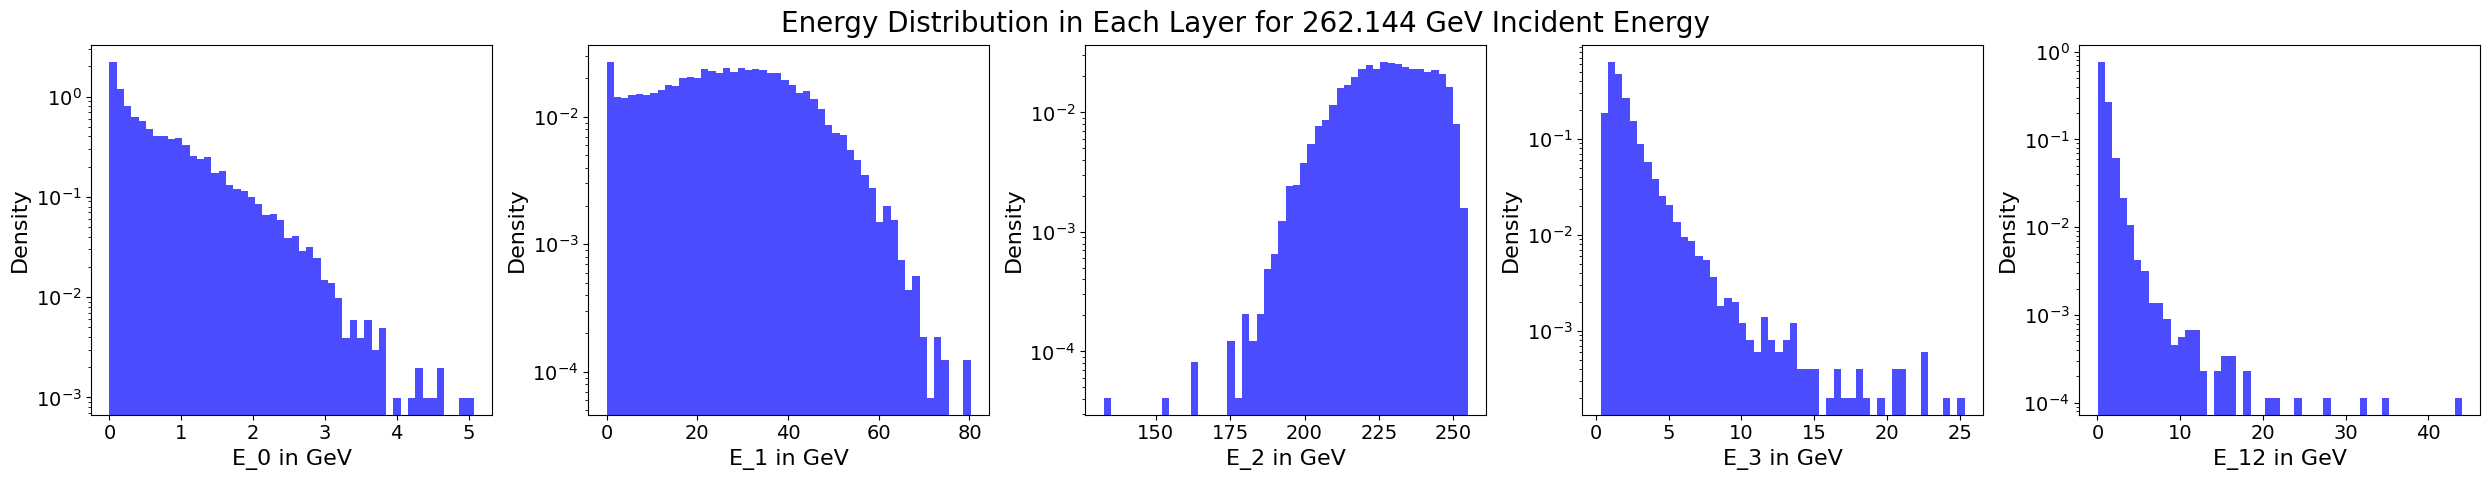

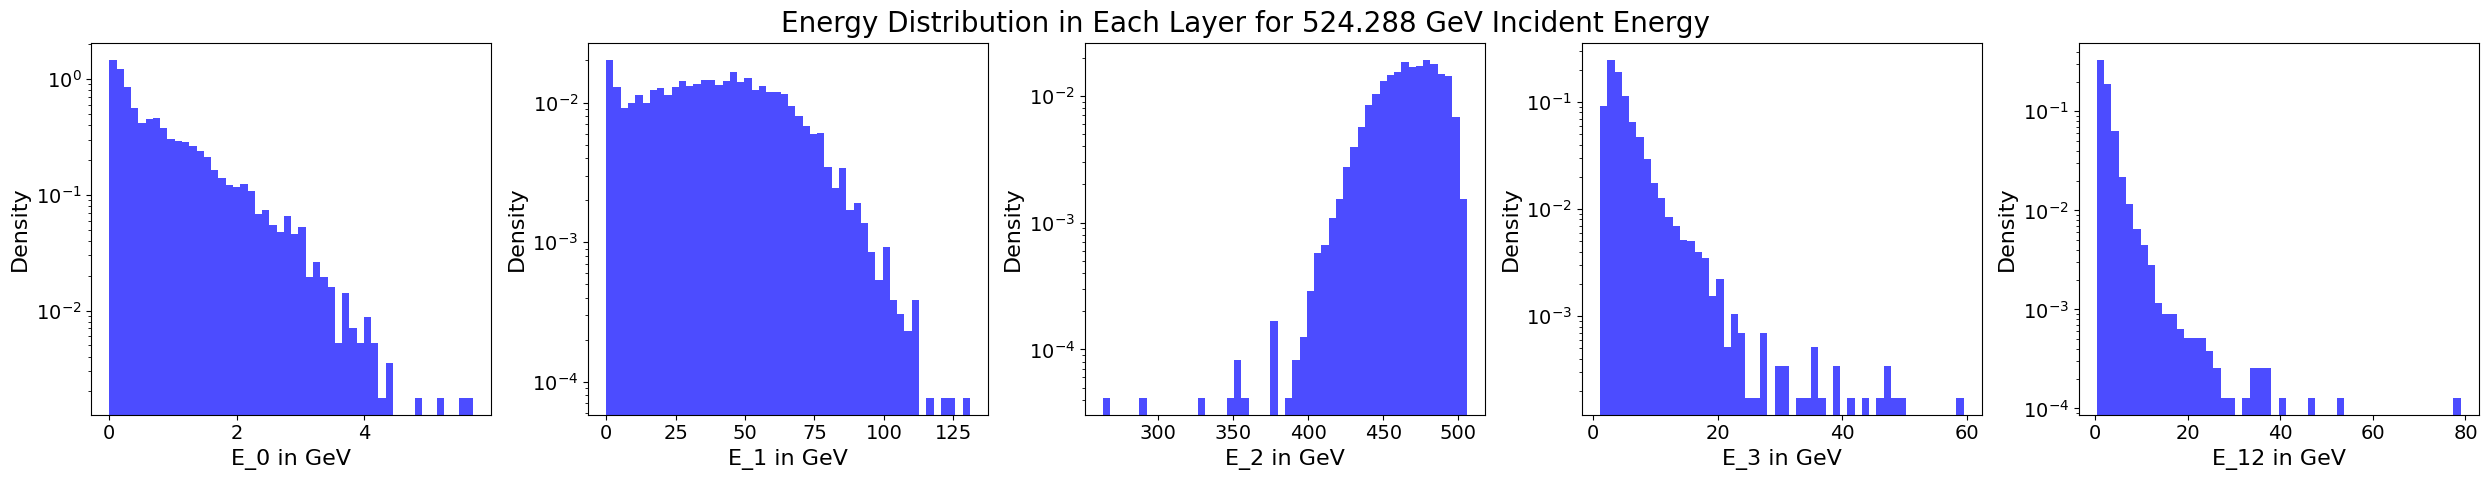

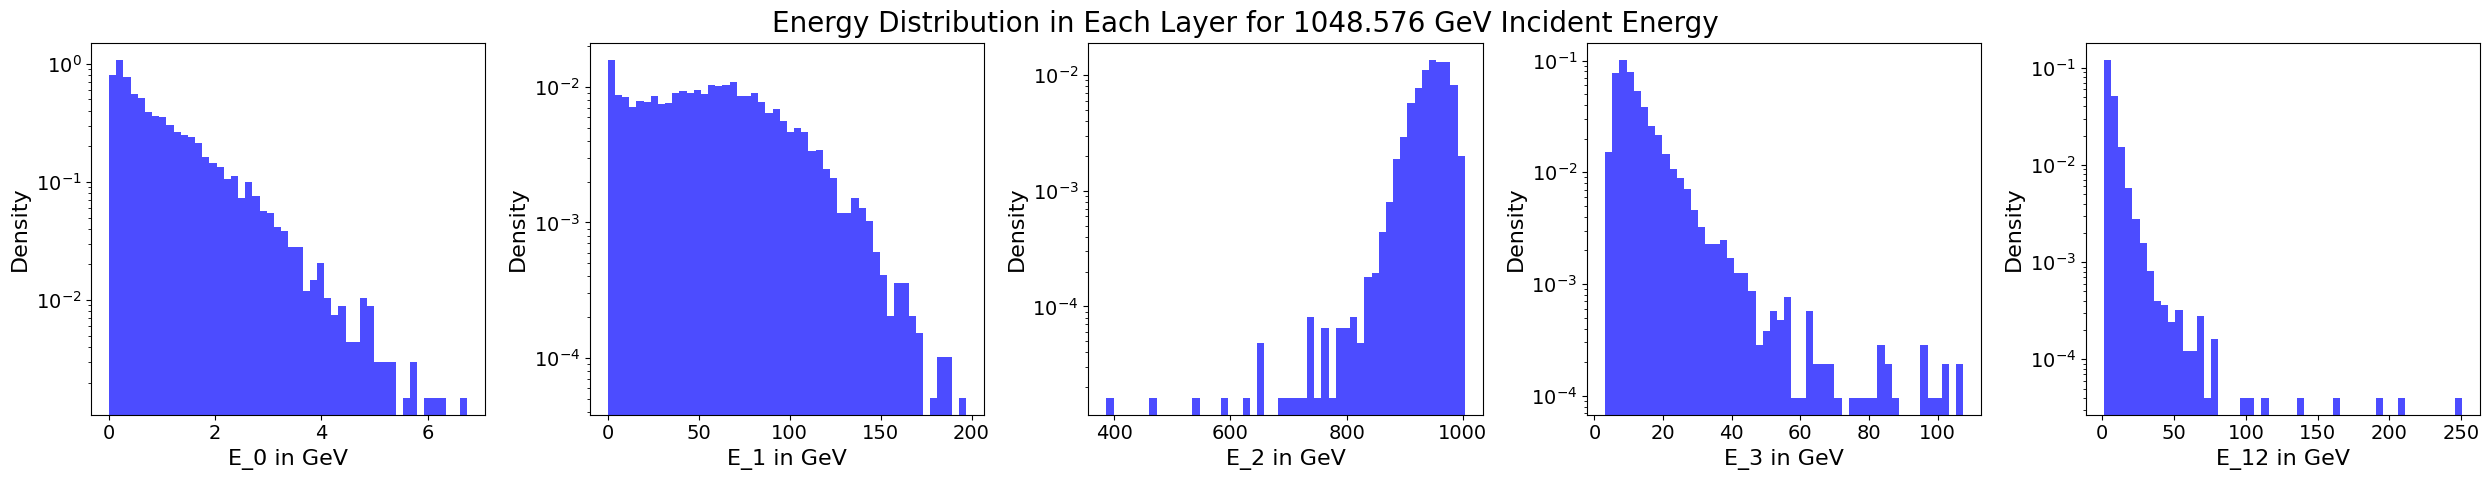

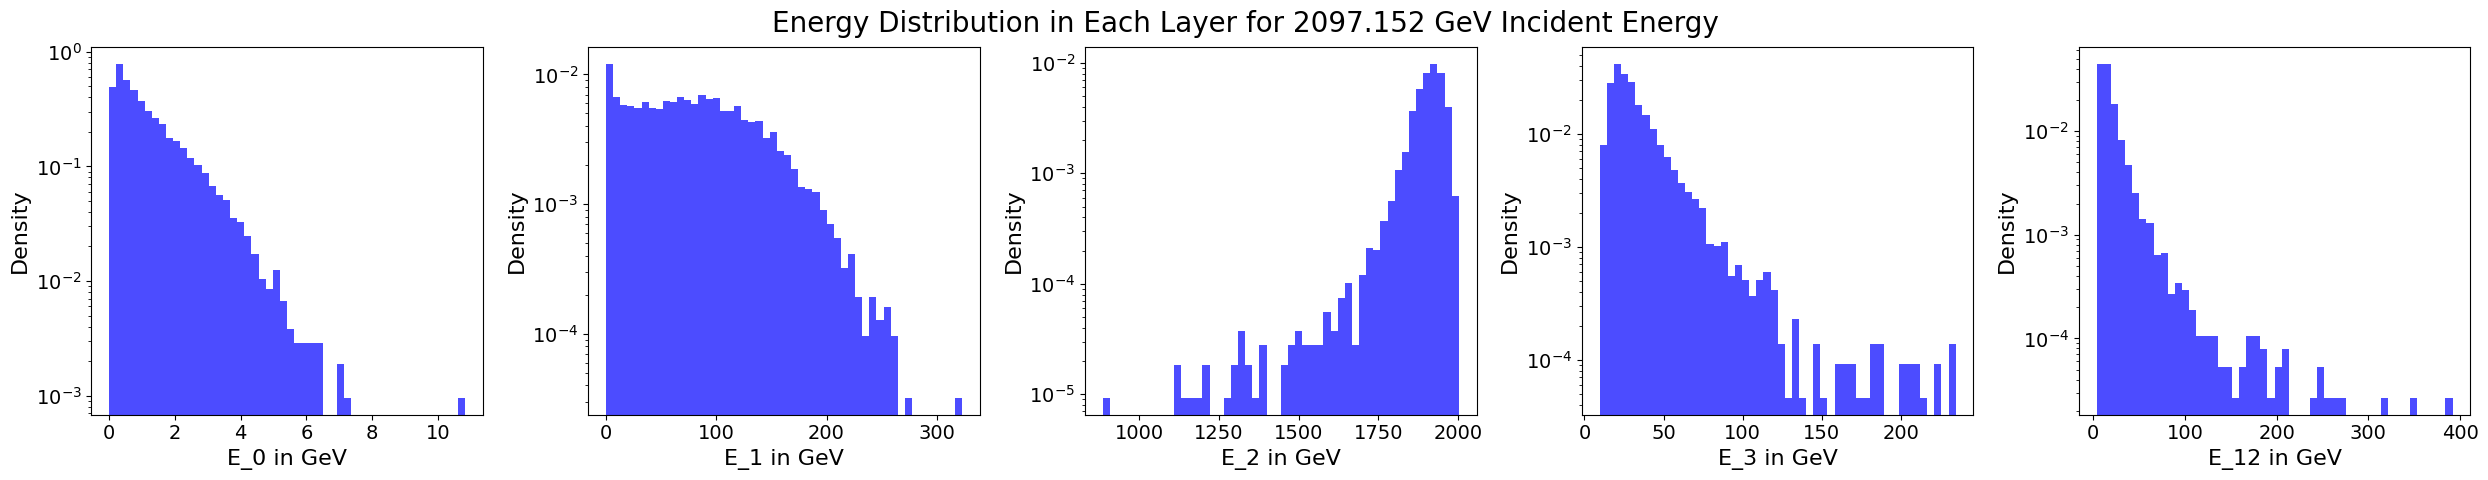

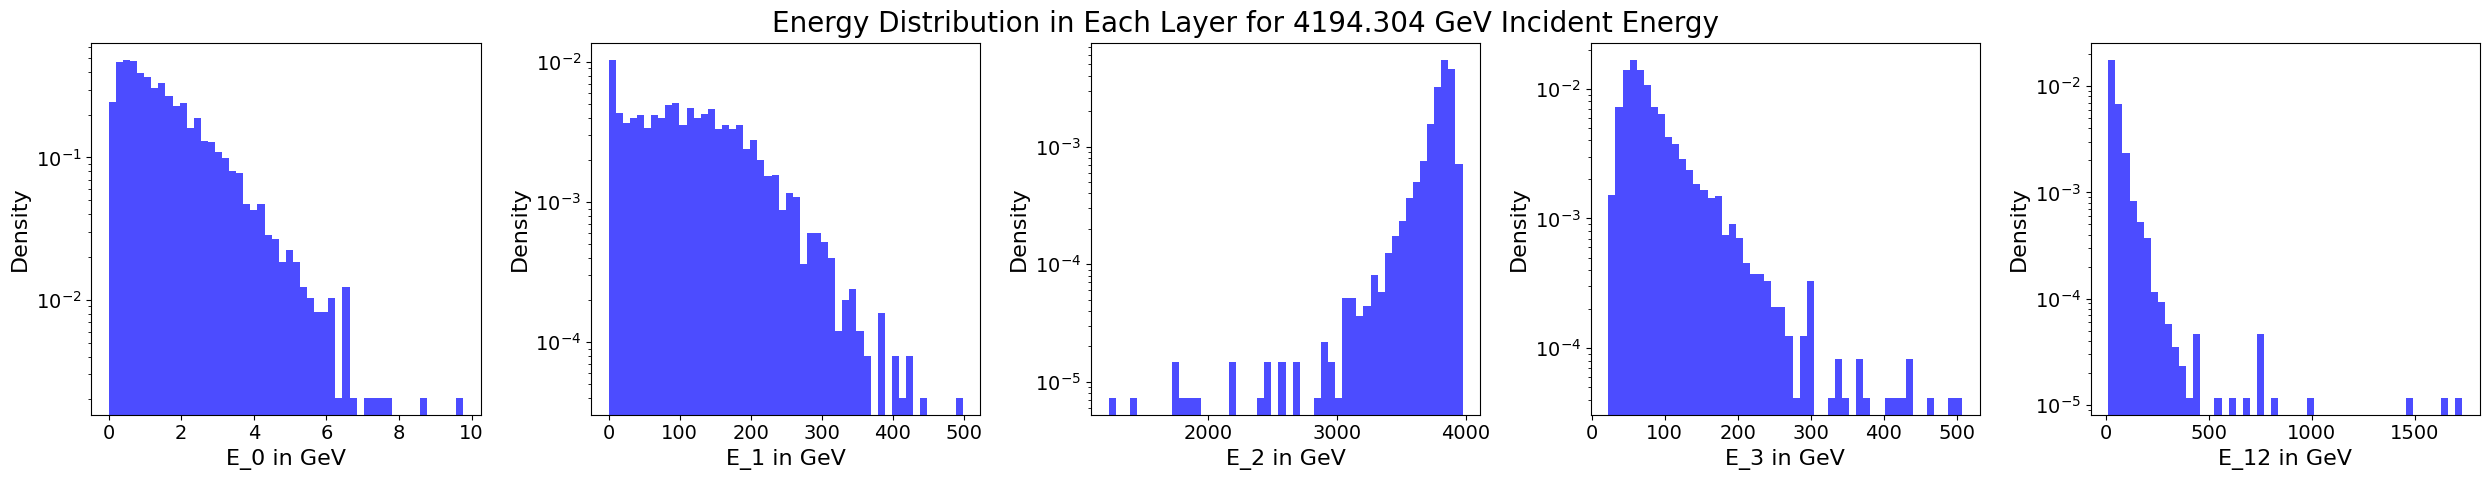

In [75]:
# Create a list of layer indices
layers = [0, 1, 2, 3, 12]
E_incs = peak_where_dict.keys()
for E_inc in E_incs:
        # Create a 4 rows x 6 columns subplot layout
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the array of subplots for easy iteration

    for i, layer in enumerate(layers):
        class_name = f'energy_layer_{layer}'
        
        # Read data from the HDF5 file
        with h5py.File(ATLAS_raw_dir, 'r') as hdf:
            if class_name in hdf:
                showers_data = hdf[class_name][:]
                showers_tensor = torch.tensor(showers_data, dtype=torch.float32)
                event_energy = showers_tensor.sum(dim=1)
            else:
                print(f"Warning: {class_name} does not exist in the HDF5 file.")
                showers_data = []
        
        # Plot the histogram
        if showers_data.size > 0:
            axes[i].hist(event_energy[peak_where_dict[E_inc]]*E_inc/1000, bins=50, color='blue', alpha=0.7, density=True)
            # axes[i].set_title(f'Layer {layer} Energy Hist', fontsize=18)  # Set title font size
            axes[i].set_yscale('log')
            axes[i].set_xlabel(f'E_{layer} in GeV', fontsize=16)   # Set x-axis label font size
            axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
        else:
            axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                        verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
            # axes[i].set_title(class_name, fontsize=18)  # Set title font size
            axes[i].set_yscale('log')
            axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
            axes[i].set_ylabel('Frequency', fontsize=16)  # Set y-axis label font size
        axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
        axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed

    # Adjust the spacing between subplots to prevent overlap

    fig.suptitle(f'Energy Distribution in Each Layer for {E_inc/1000} GeV Incident Energy', fontsize=20, y=0.95)
    plt.tight_layout()
    # Display the figure
    plt.show()

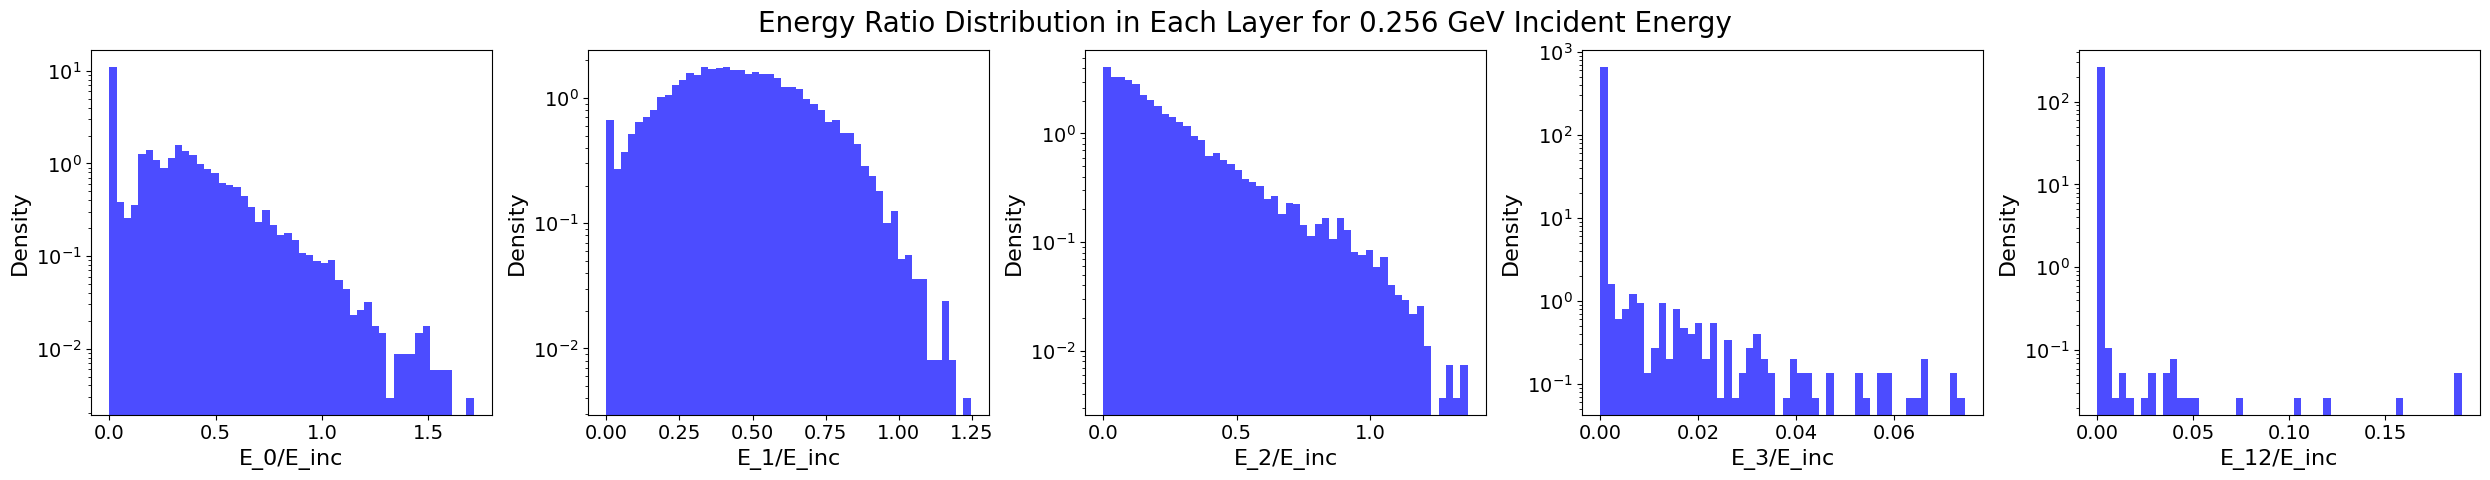

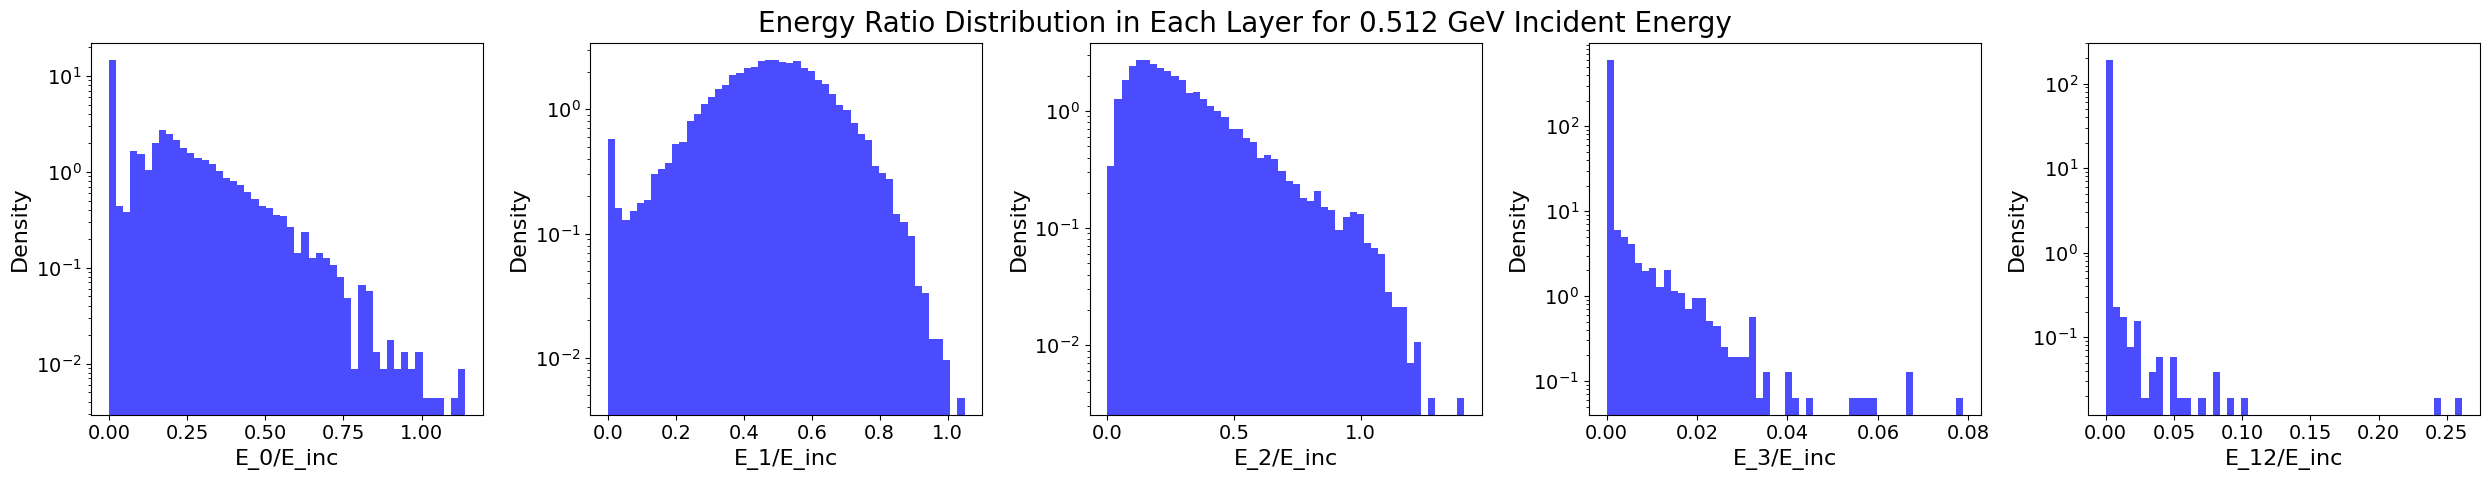

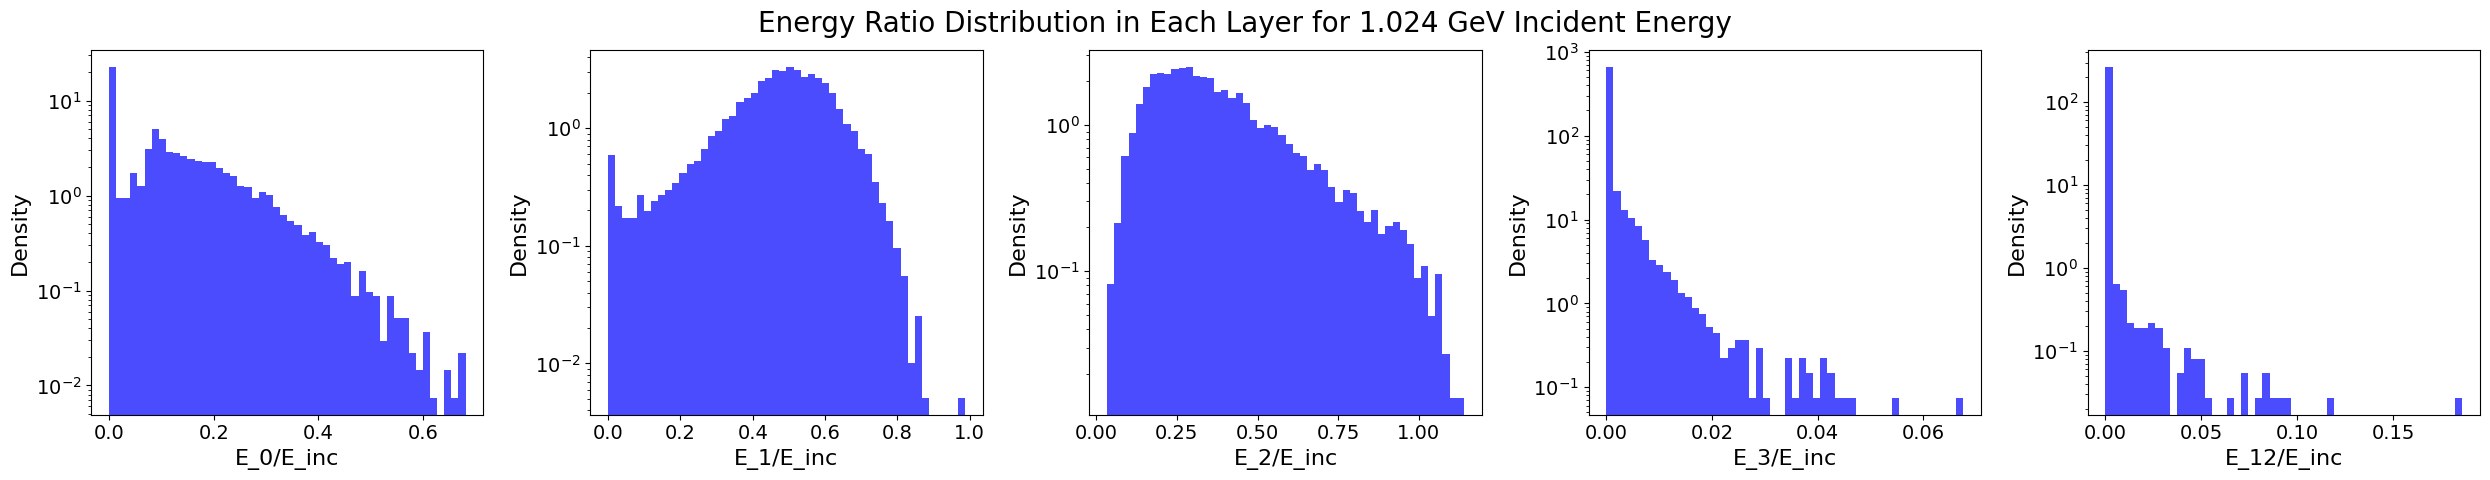

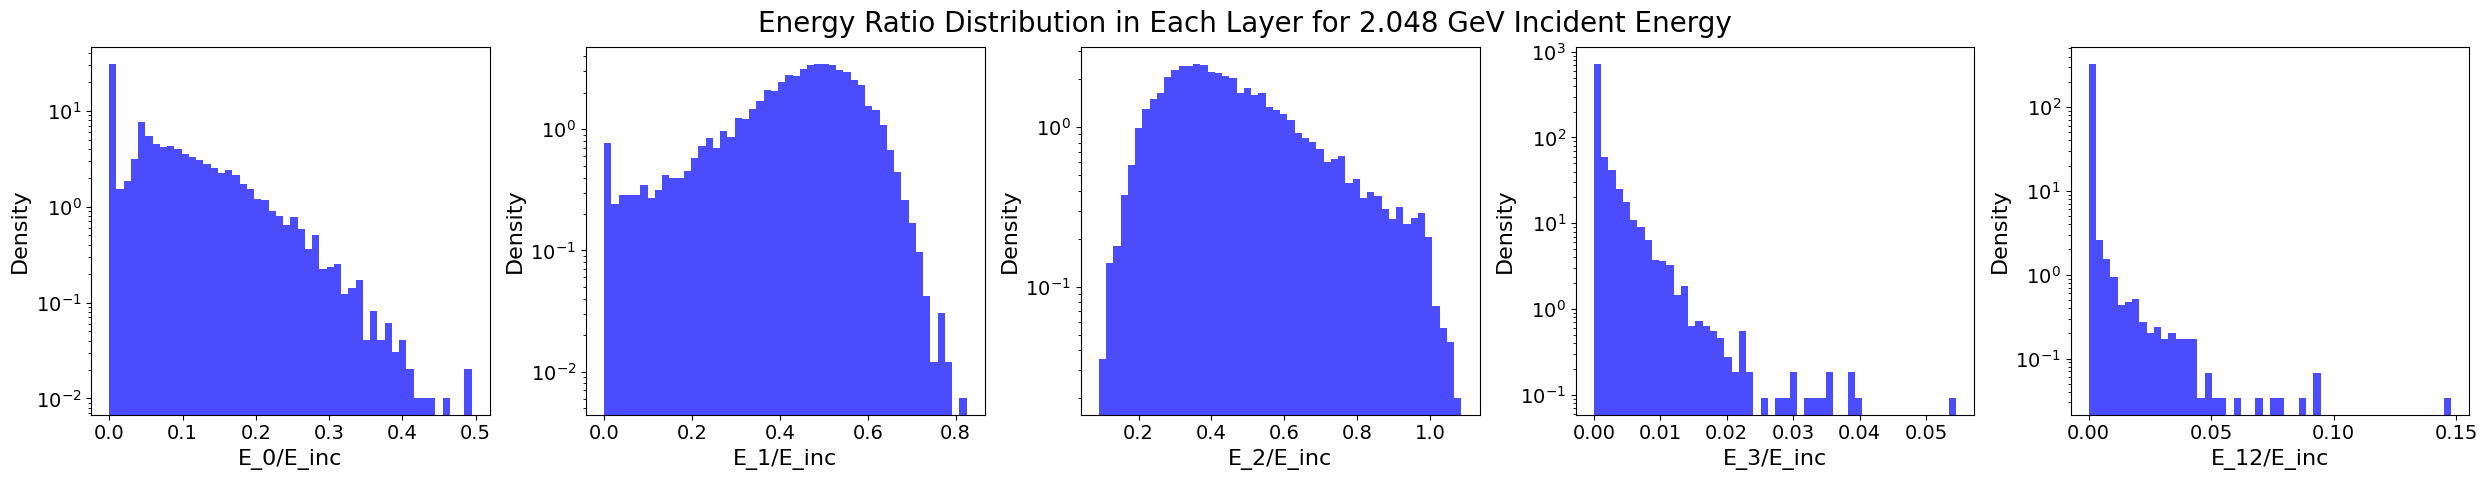

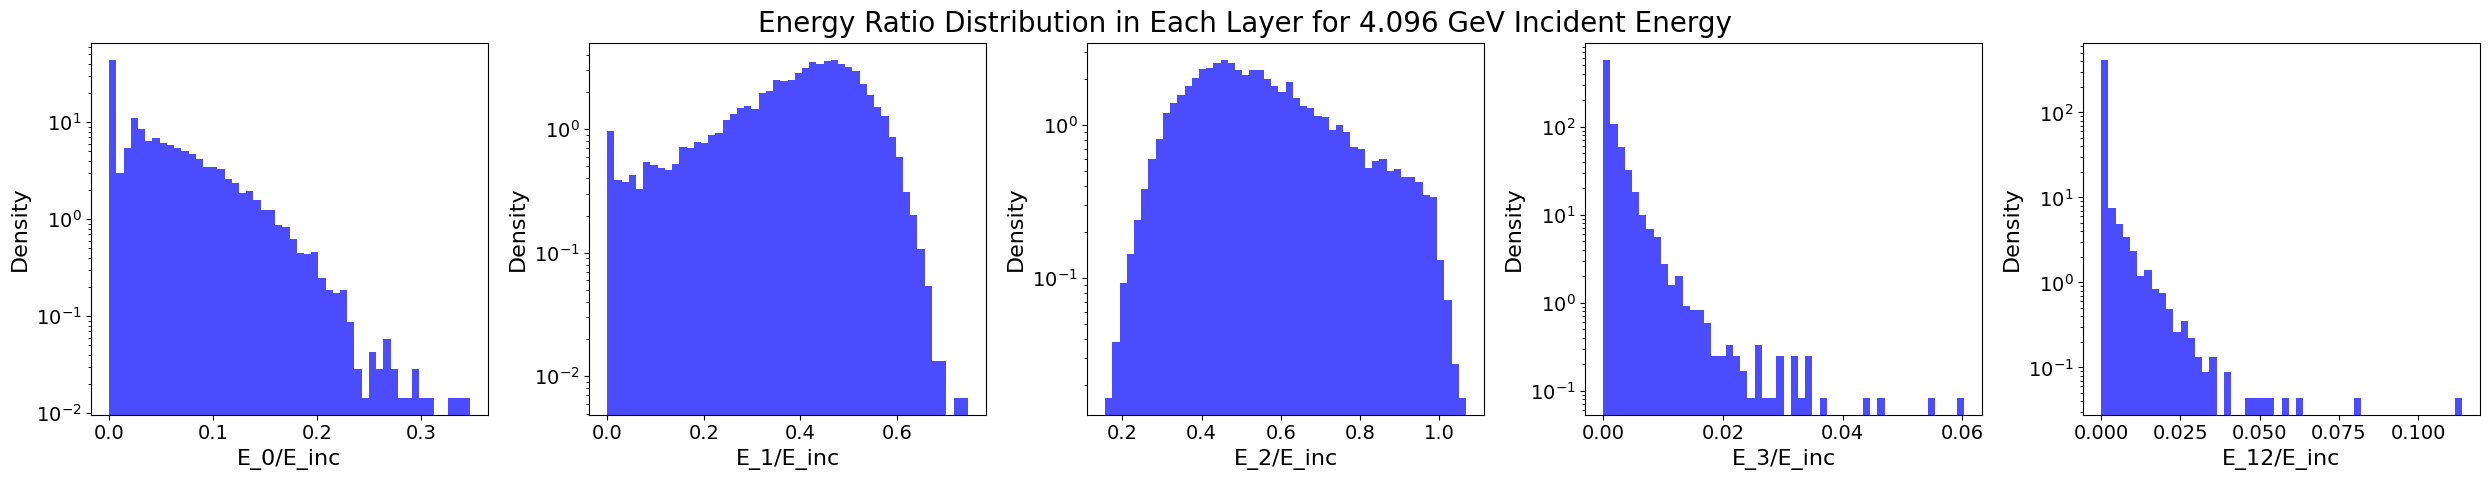

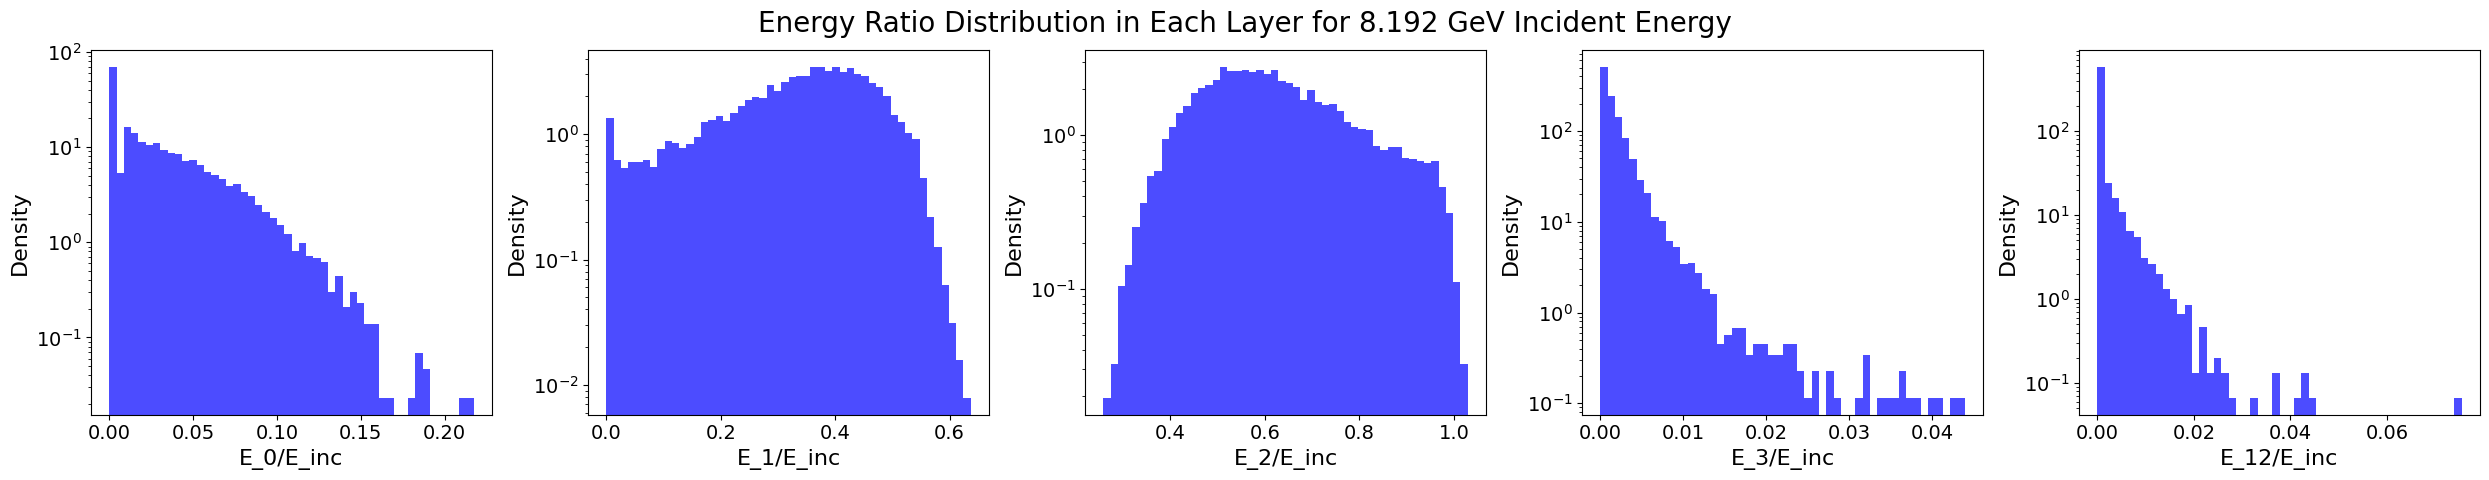

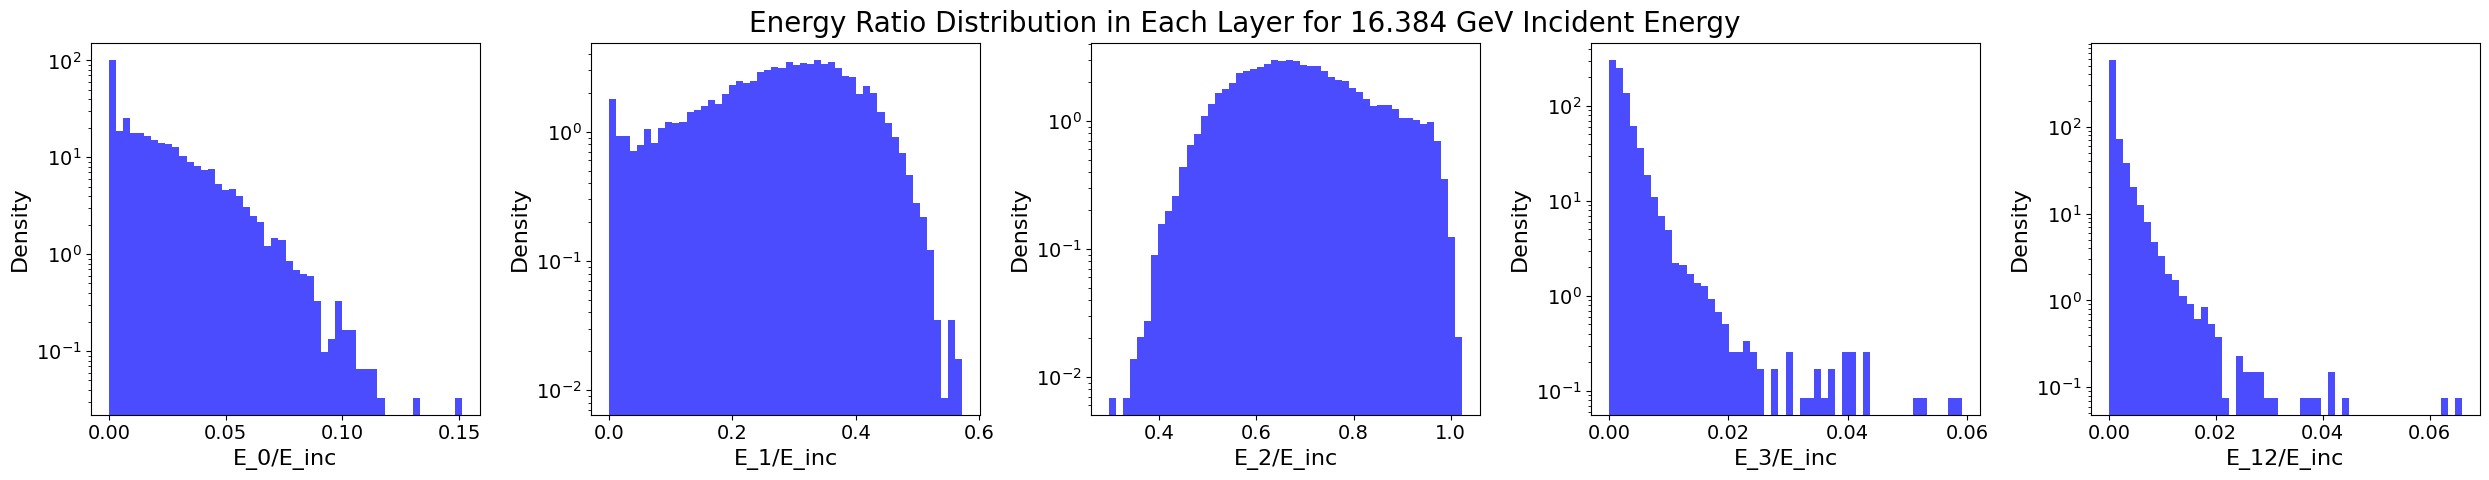

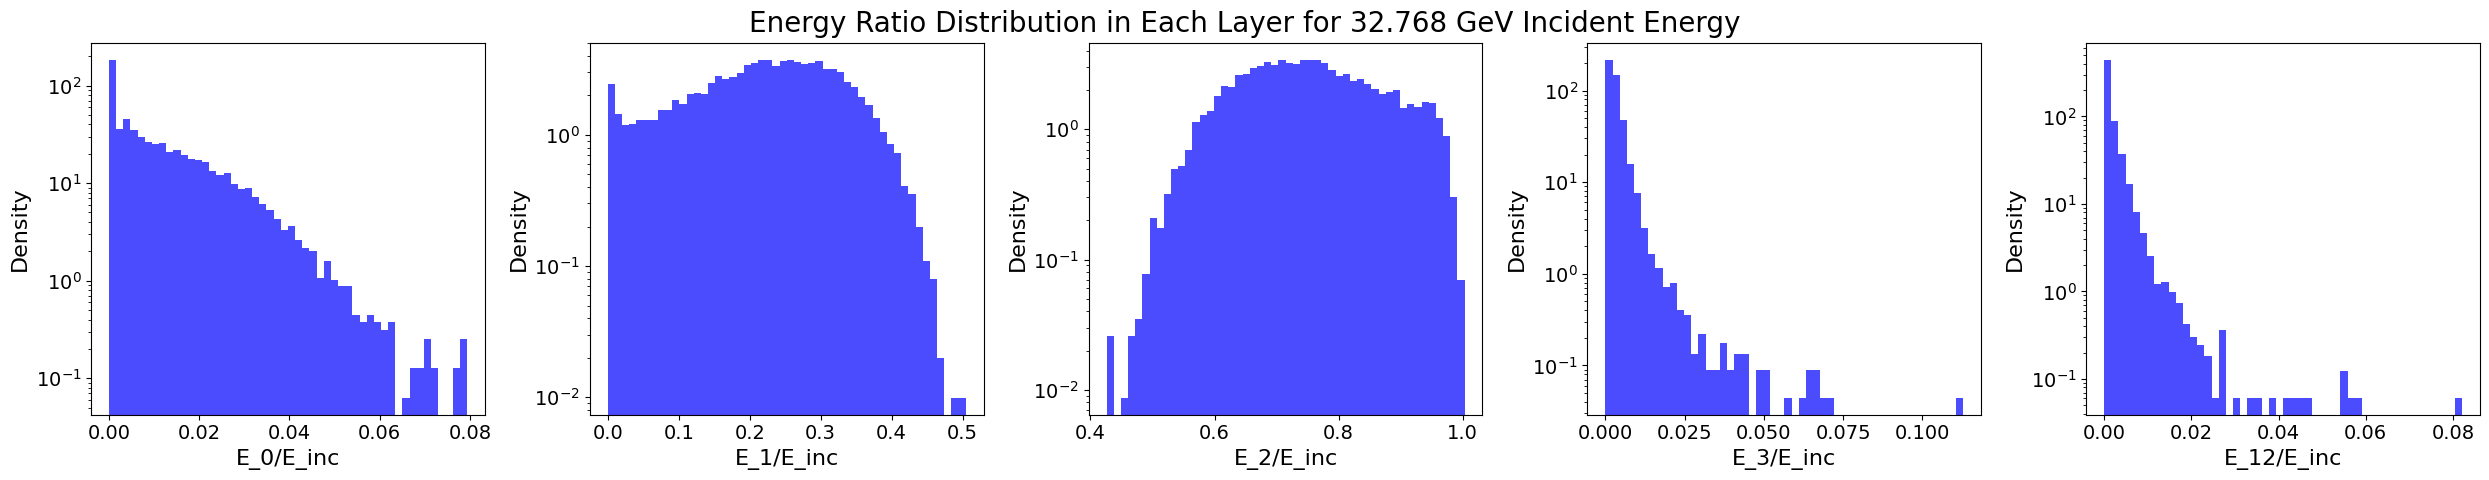

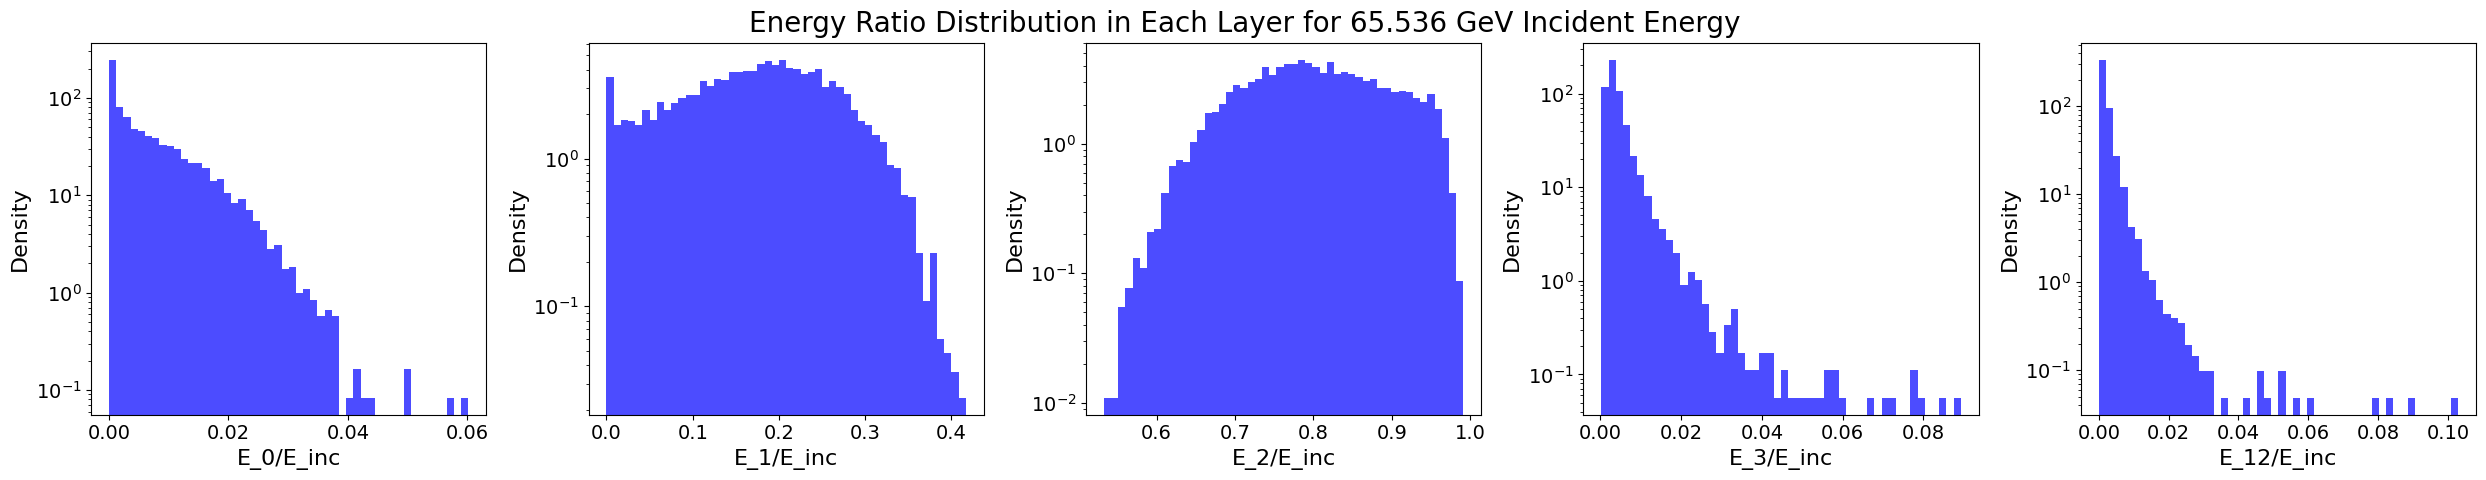

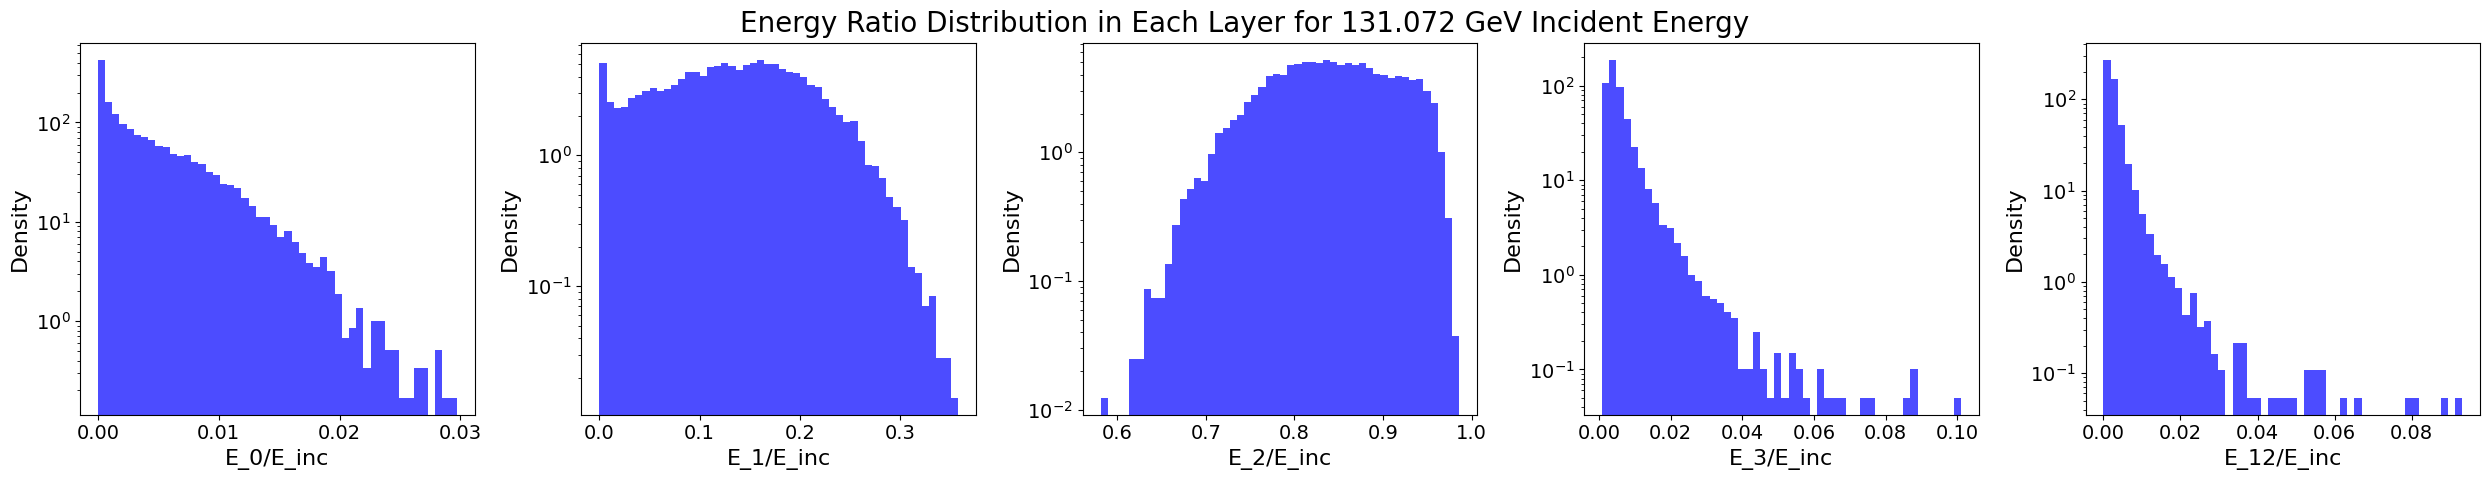

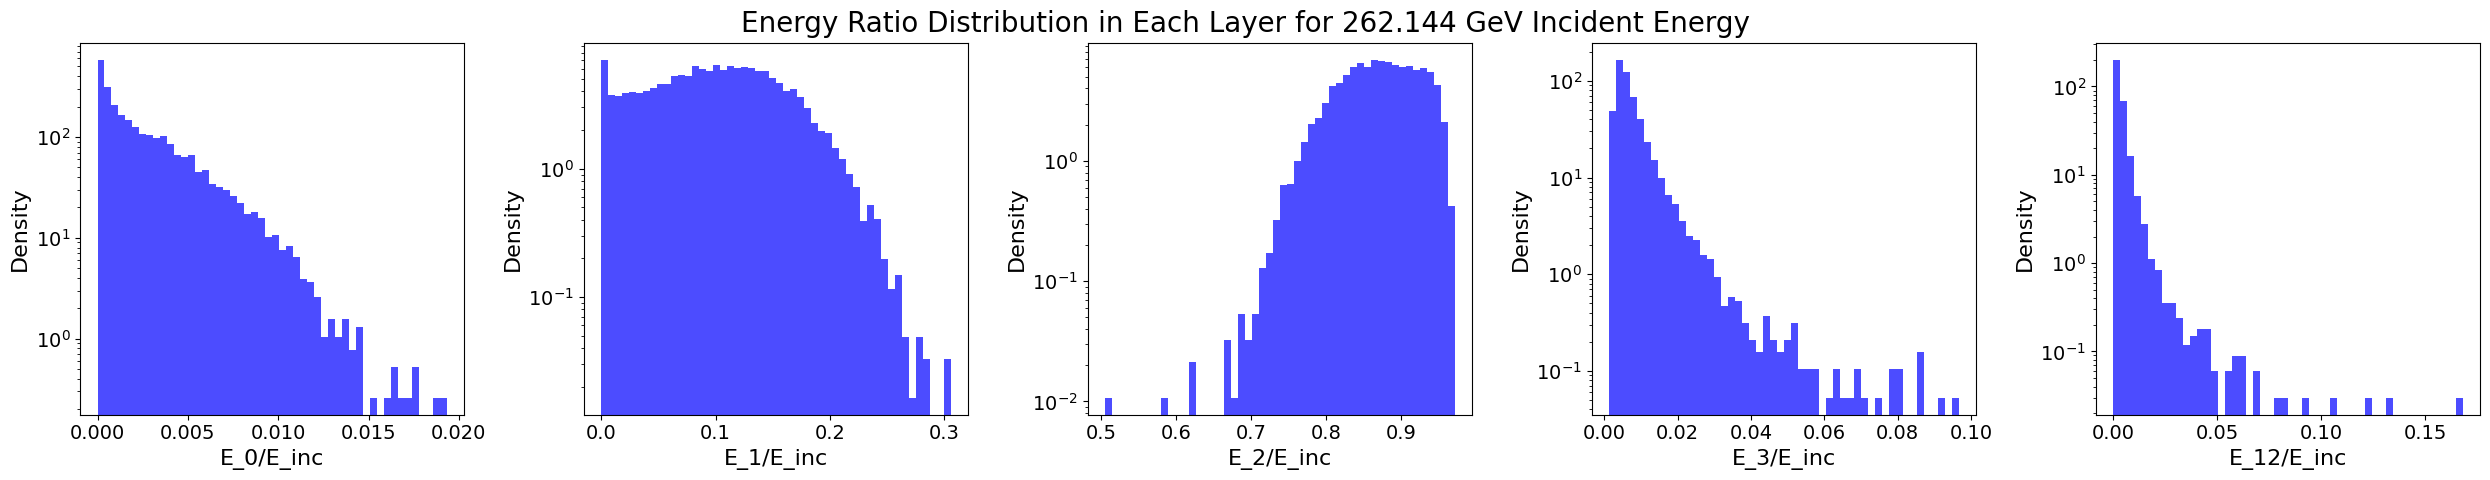

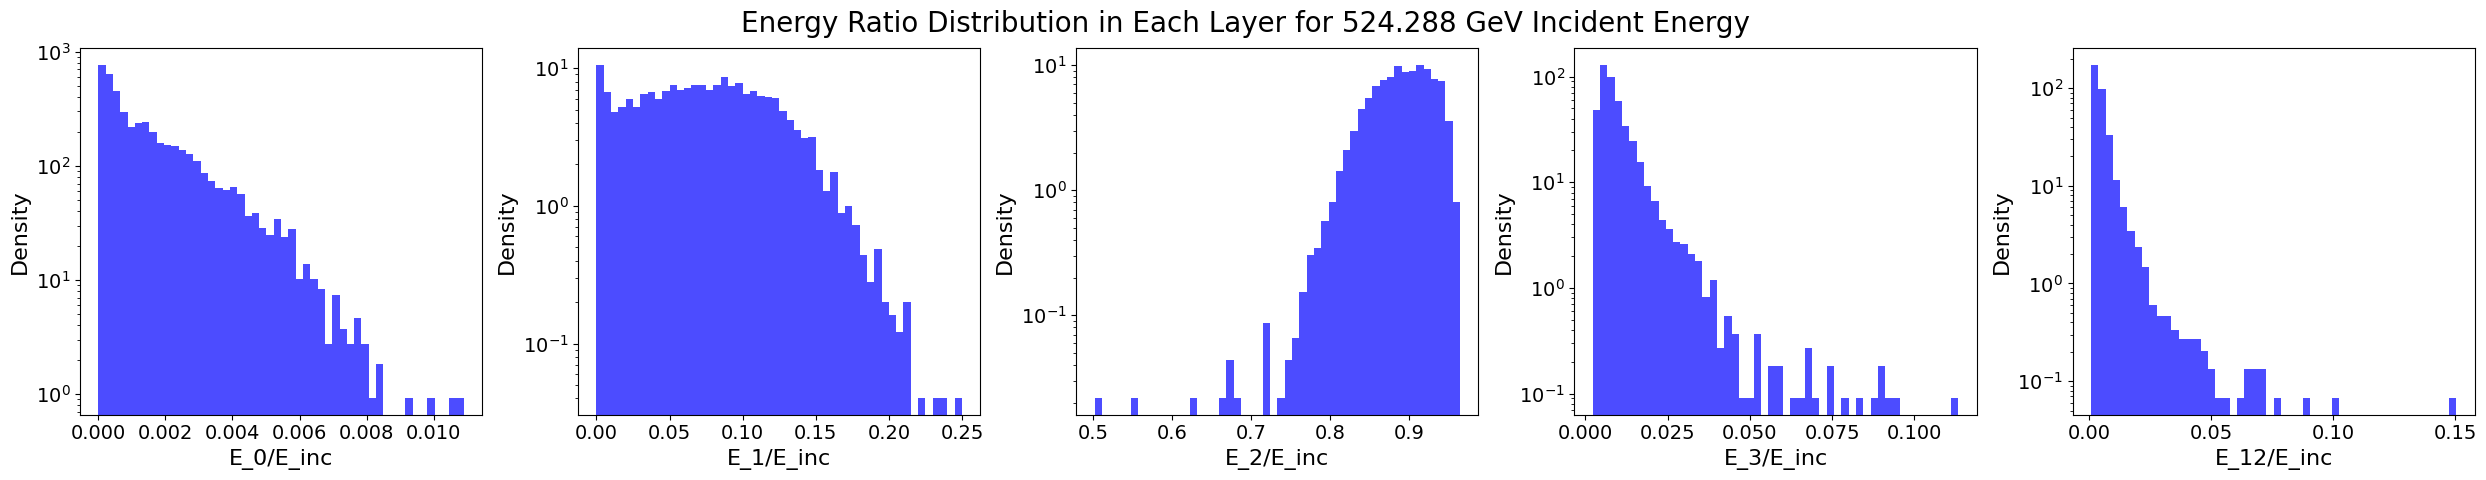

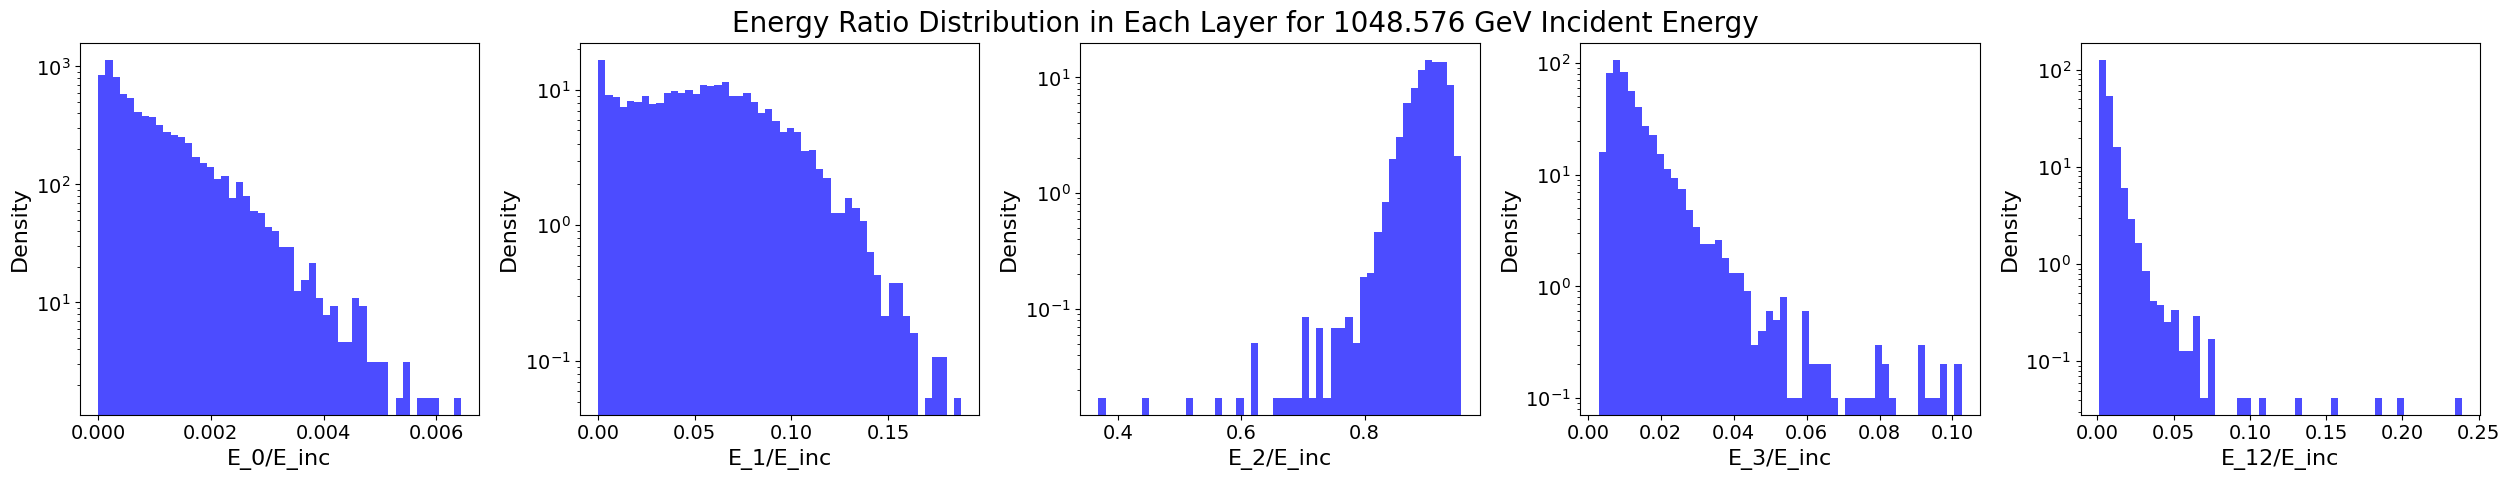

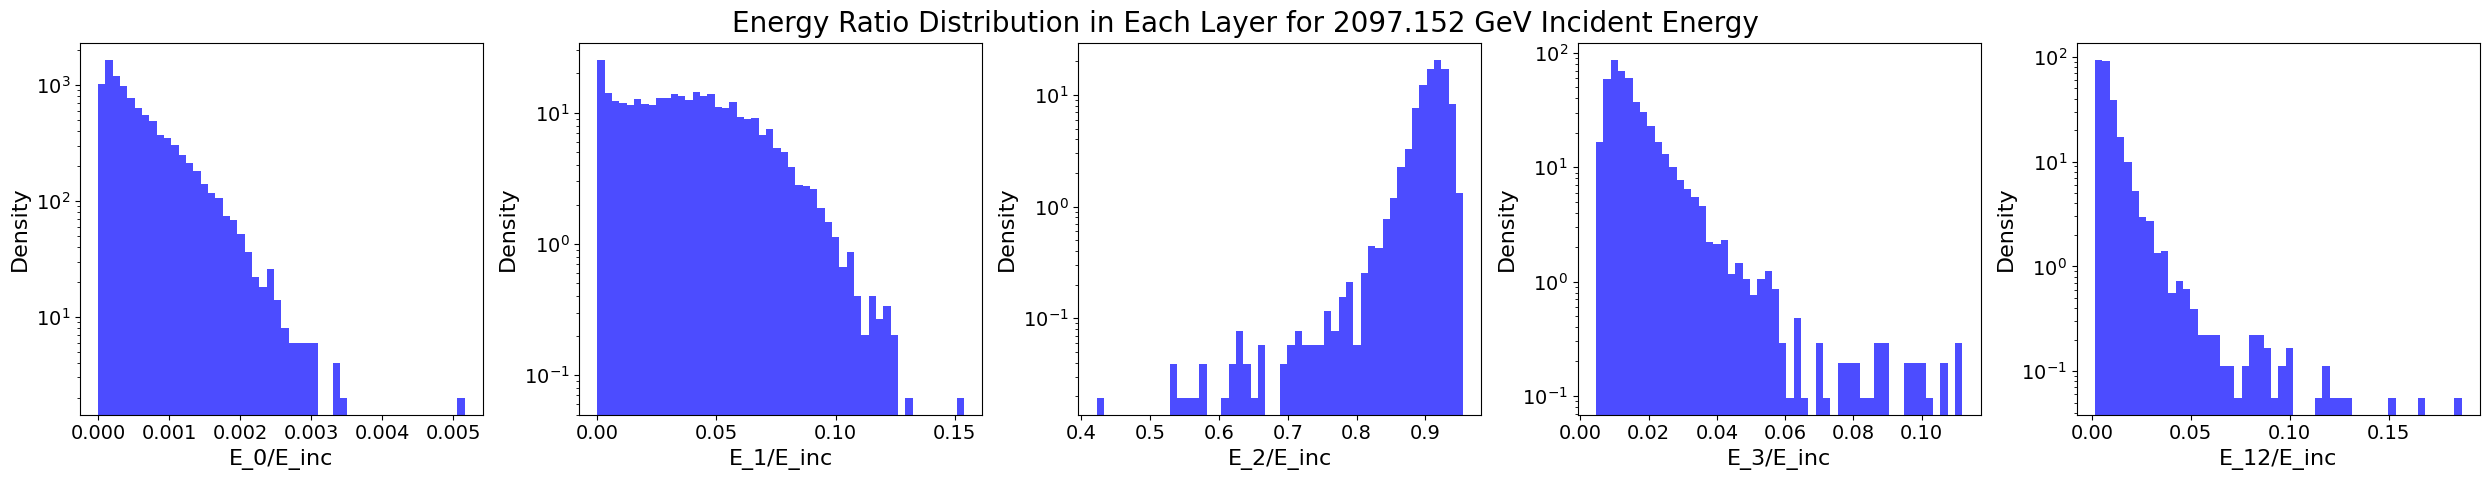

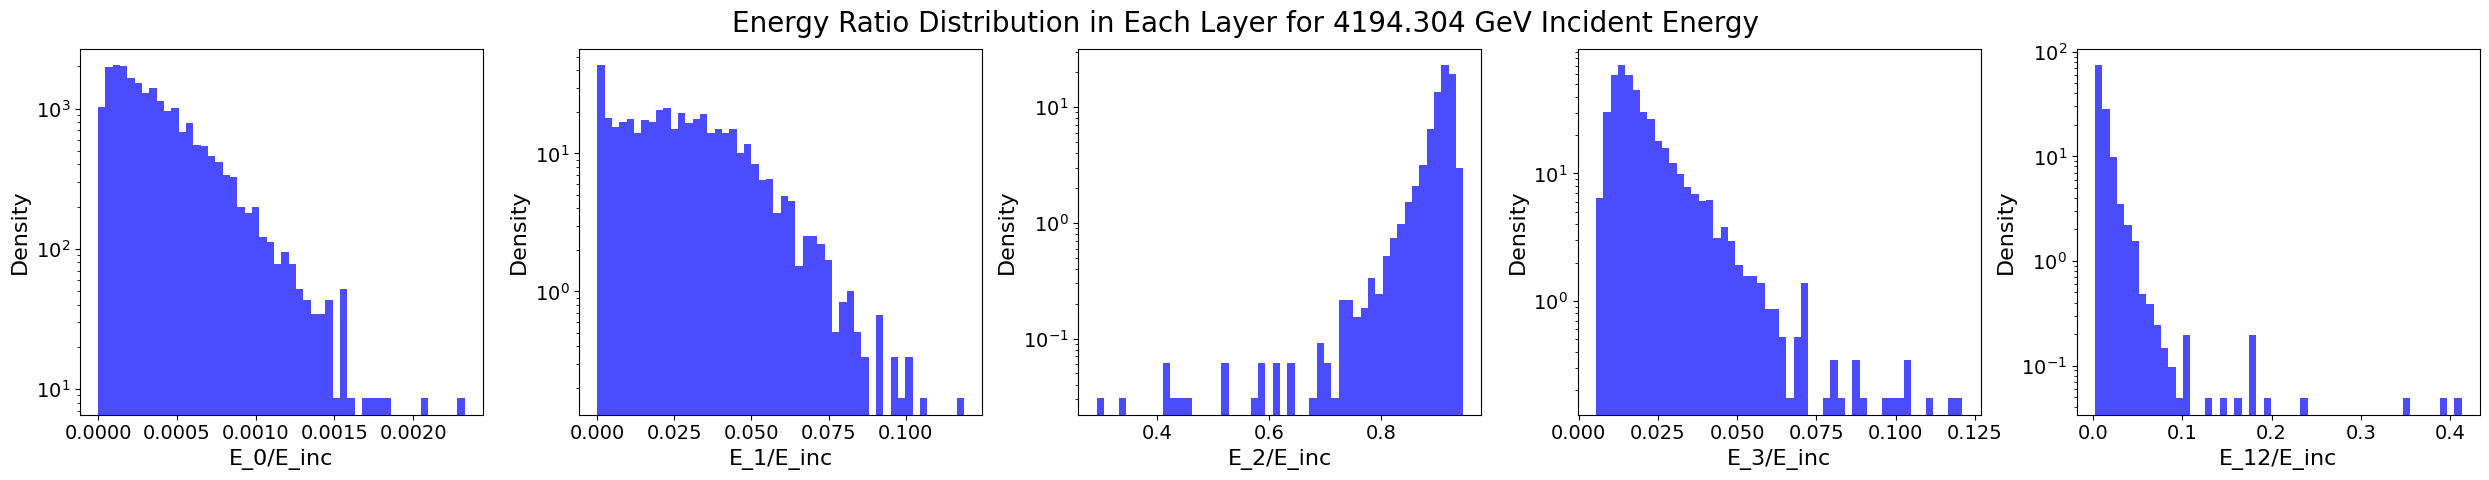

In [83]:
# Create a list of layer indices
layers = [0, 1, 2, 3, 12]
E_incs = peak_where_dict.keys()
for E_inc in E_incs:
        # Create a 4 rows x 6 columns subplot layout
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the array of subplots for easy iteration

    for i, layer in enumerate(layers):
        class_name = f'energy_layer_{layer}'
        
        # Read data from the HDF5 file
        with h5py.File(ATLAS_raw_dir, 'r') as hdf:
            if class_name in hdf:
                showers_data = hdf[class_name][:]
                showers_tensor = torch.tensor(showers_data, dtype=torch.float32)
                event_energy = showers_tensor.sum(dim=1)
            else:
                print(f"Warning: {class_name} does not exist in the HDF5 file.")
                showers_data = []
        
        # Plot the histogram
        if showers_data.size > 0:
            axes[i].hist(event_energy[peak_where_dict[E_inc]], bins=50, color='blue', alpha=0.7, density=True)
            # axes[i].set_title(f'Layer {layer} Energy Hist', fontsize=18)  # Set title font size
            axes[i].set_yscale('log')
            axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
            axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
        else:
            axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                        verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
            # axes[i].set_title(class_name, fontsize=18)  # Set title font size
            axes[i].set_yscale('log')
            axes[i].set_xlabel(f'E_{layer}/E_inc', fontsize=16)   # Set x-axis label font size
            axes[i].set_ylabel('Frequency', fontsize=16)  # Set y-axis label font size
        axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
        axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed

    # Adjust the spacing between subplots to prevent overlap

    fig.suptitle(f'Energy Ratio Distribution in Each Layer for {E_inc/1000} GeV Incident Energy', fontsize=20, y=0.95)
    plt.tight_layout()
    # Display the figure
    plt.show()

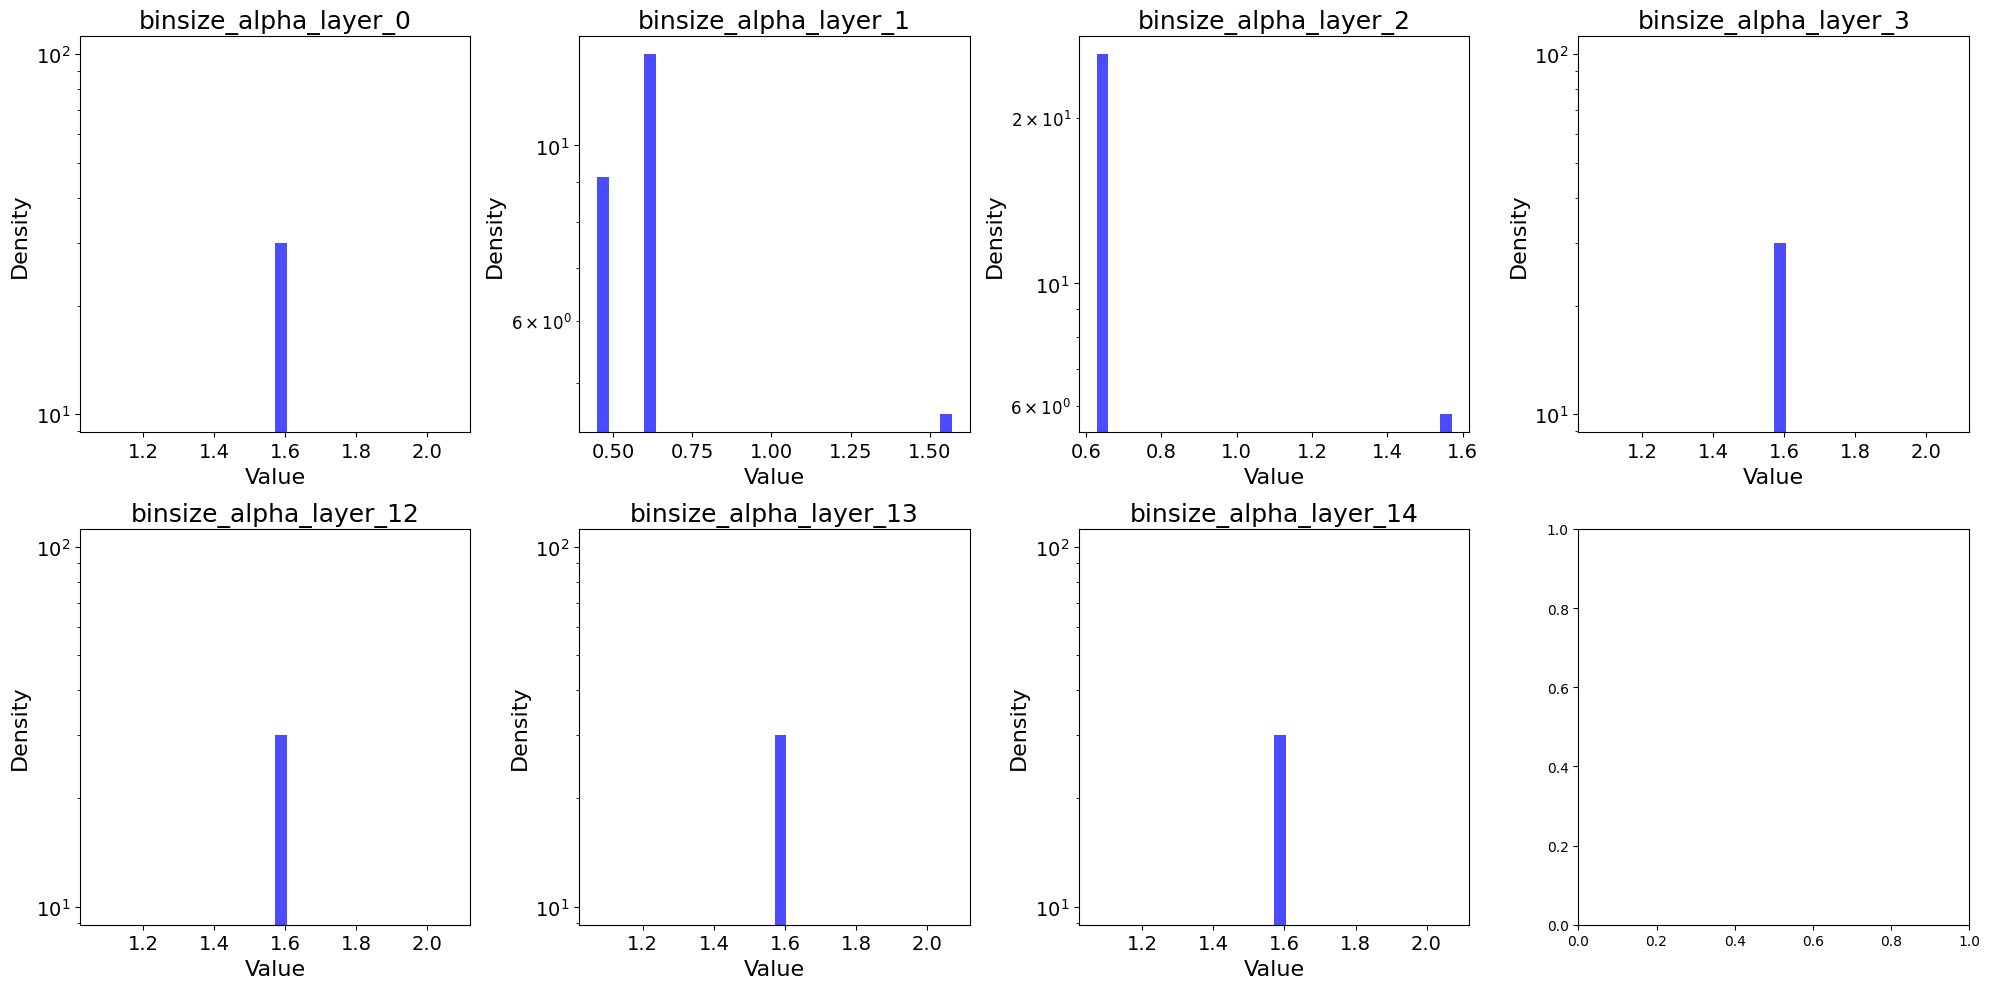

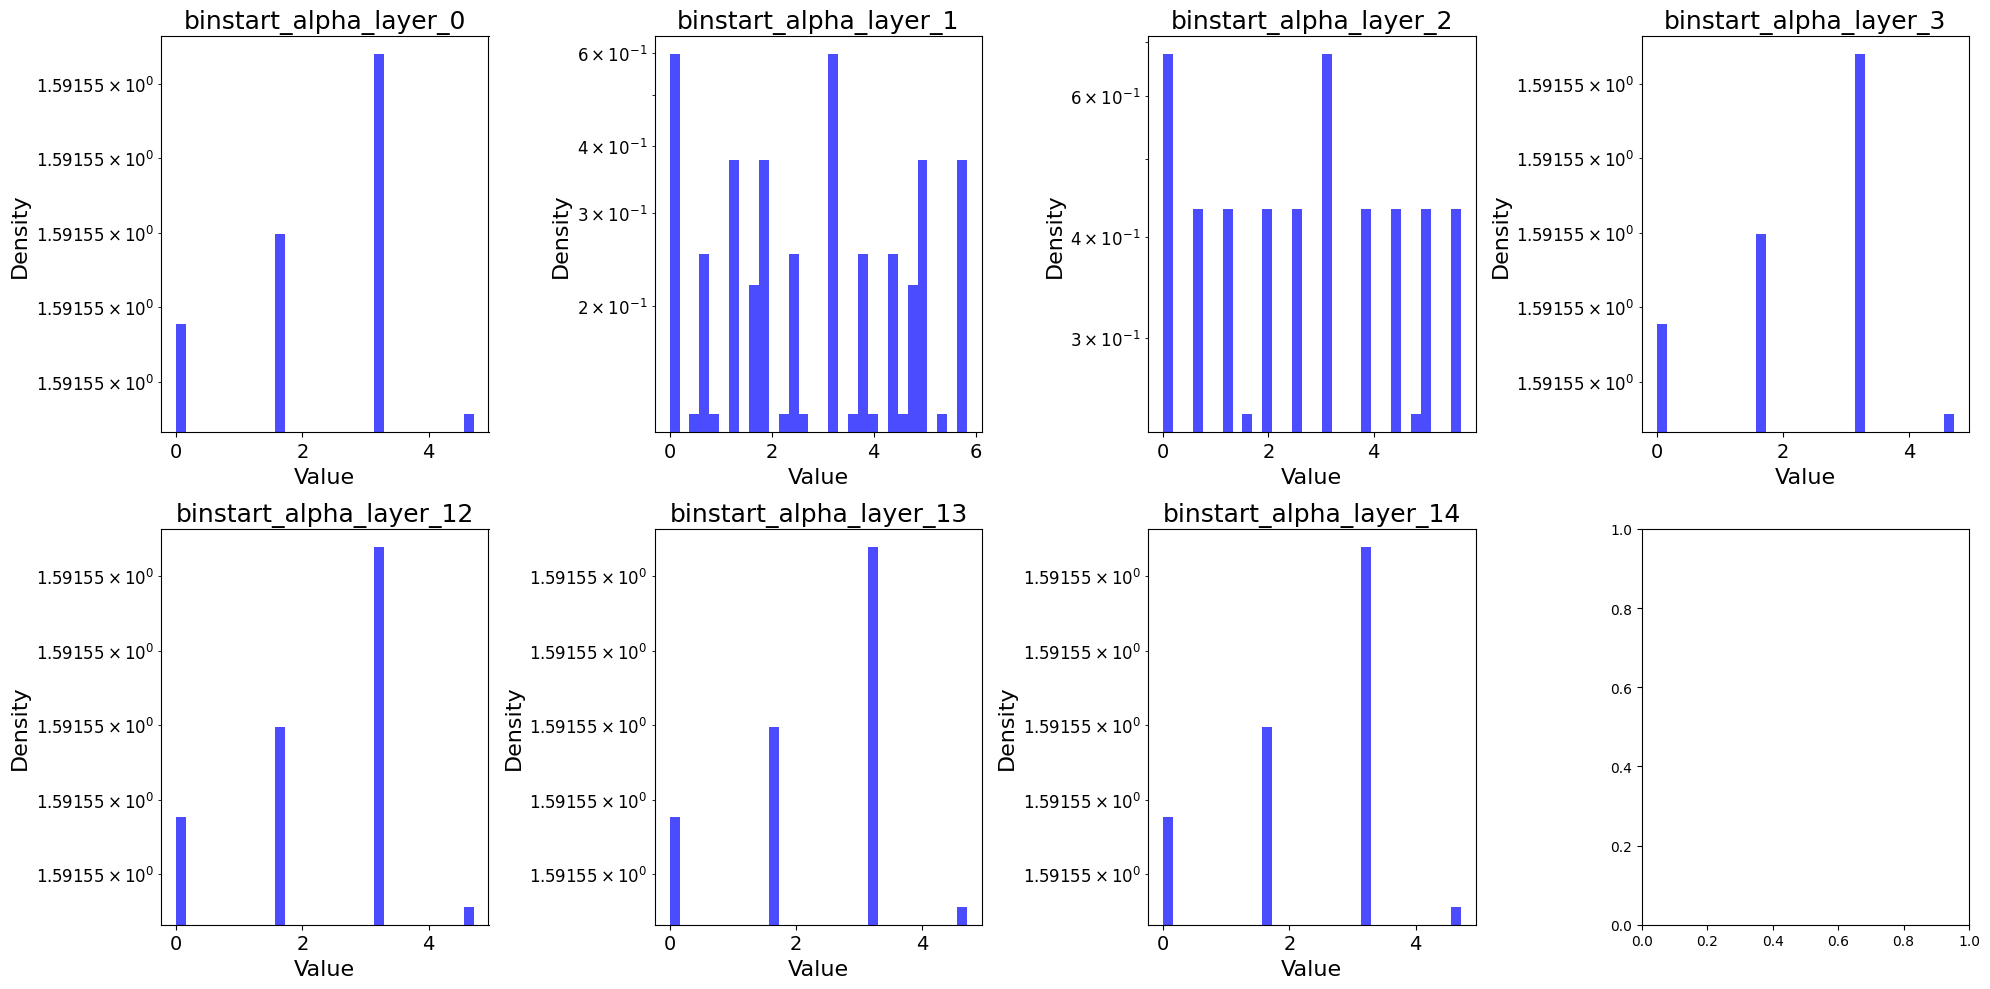

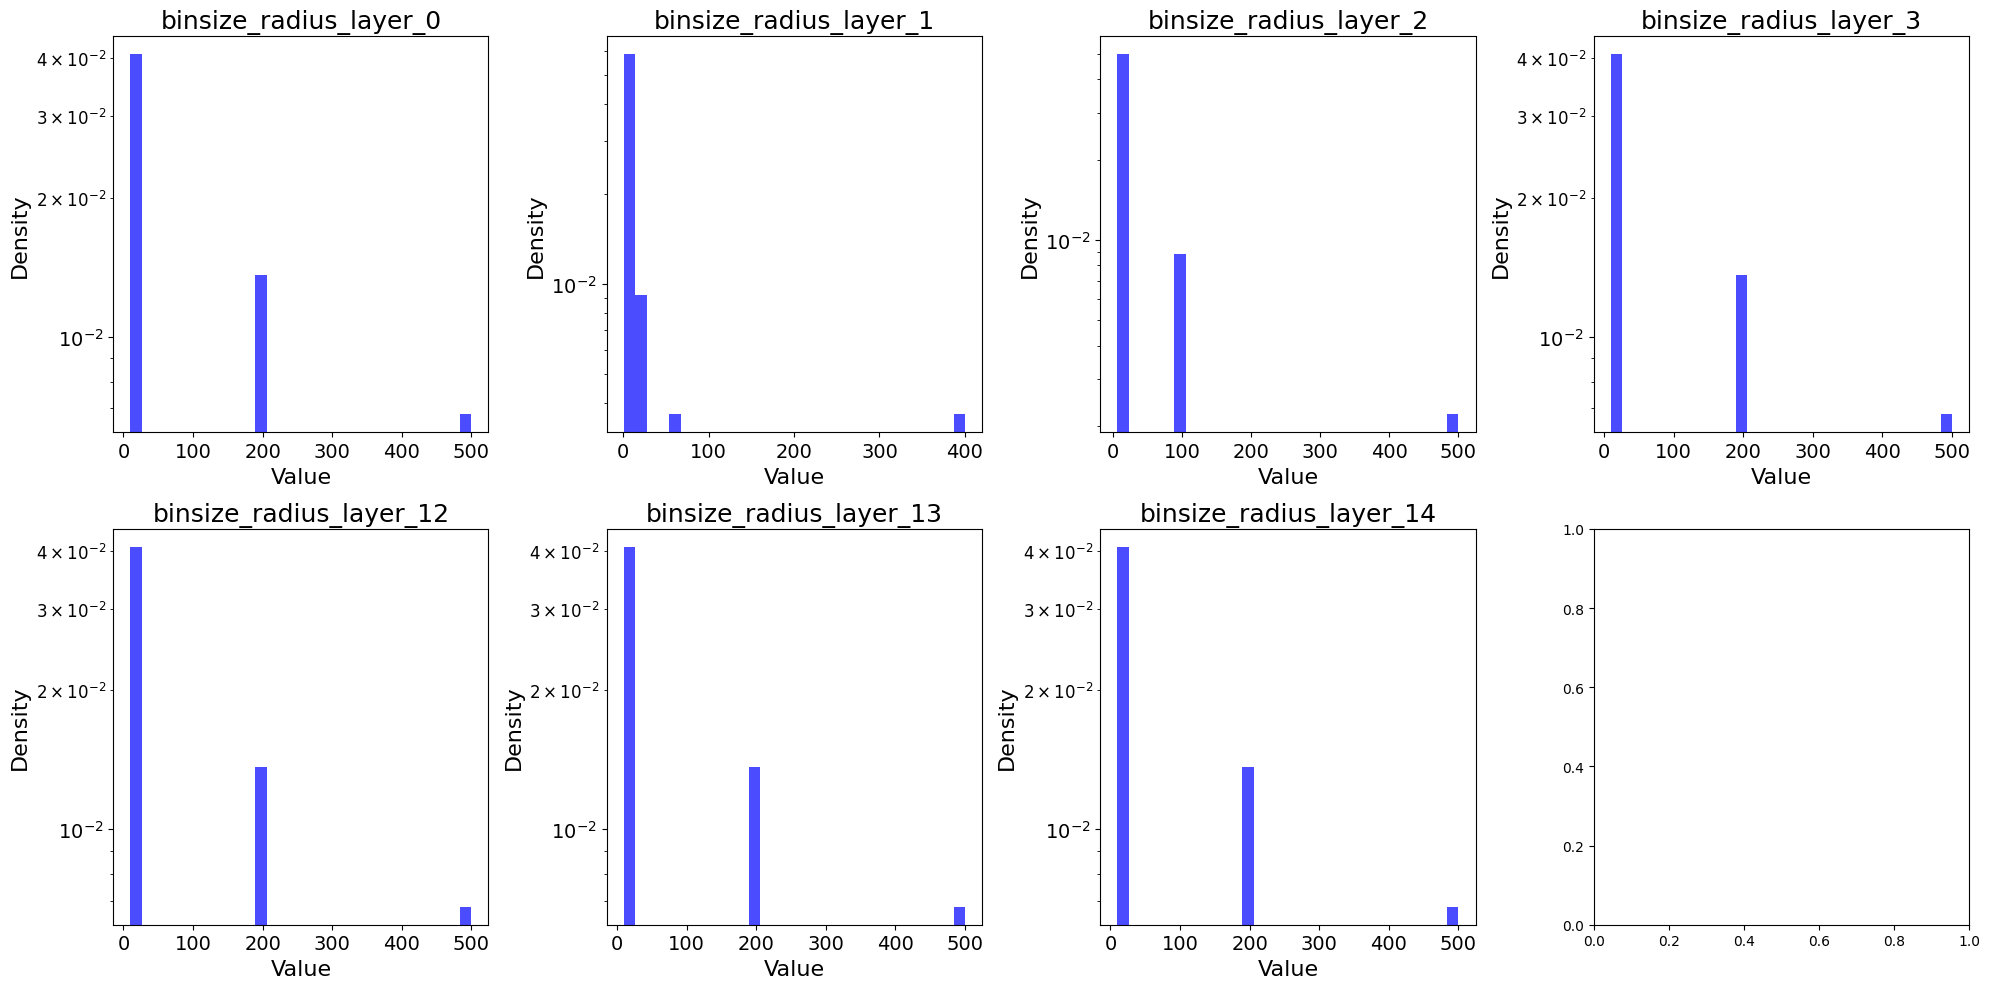

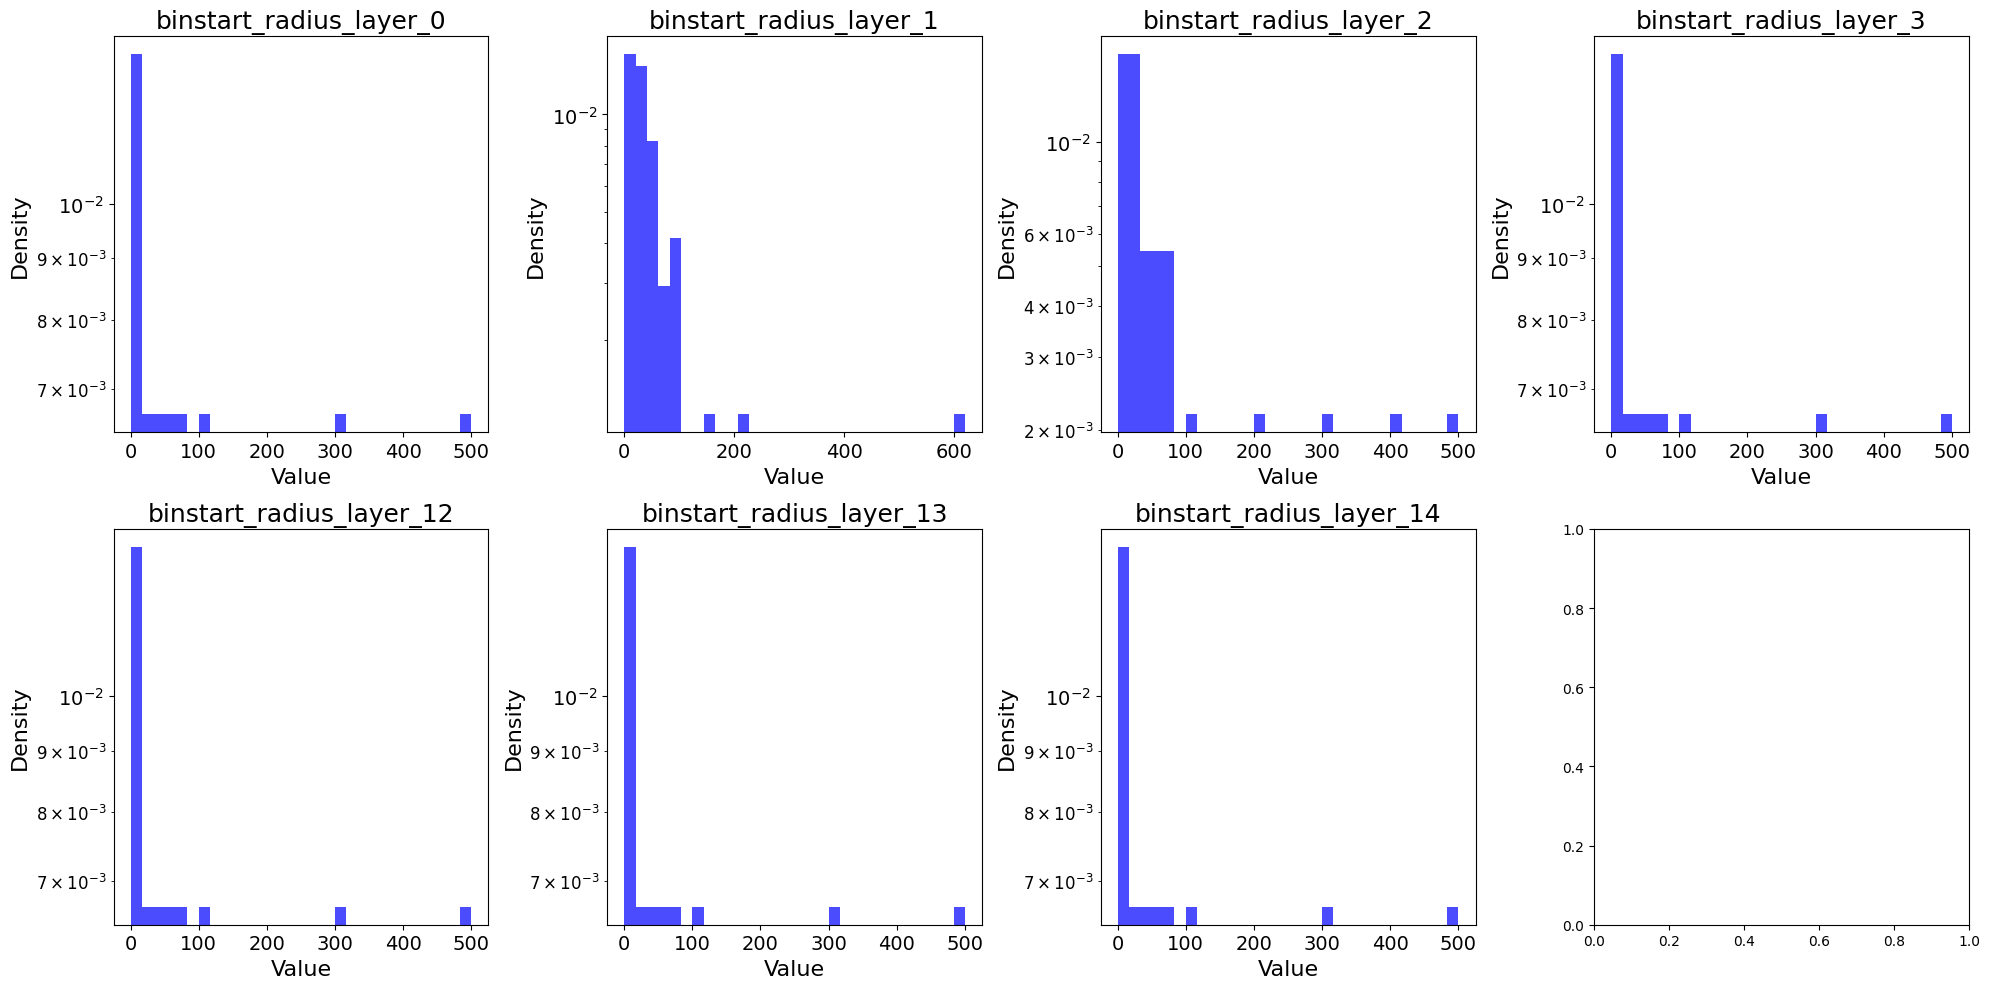

In [13]:
# Create a list of layer indices
layers = [0, 1, 2, 3, 12, 13, 14]
classes = ['binsize_alpha', 'binstart_alpha', 'binsize_radius', 'binstart_radius']

for class_ in classes:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the array of subplots for easy iteration
    for i, layer in enumerate(layers):
        class_name = f'{class_}_layer_{layer}'
        
        # Read data from the HDF5 file
        with h5py.File(ATLAS_raw_dir, 'r') as hdf:
            if class_name in hdf:
                showers_data = hdf[class_name][:]
                # sparsity_ratio = np.sum(showers_data == 0, axis=1)/showers_data.shape[1]
            else:
                print(f"Warning: {class_name} does not exist in the HDF5 file.")
                showers_data = []
        
        # Plot the histogram
        if showers_data.size > 0:
            axes[i].hist(showers_data, bins=30, color='blue', alpha=0.7, density=True)
            axes[i].set_title(class_name, fontsize=18)  # Set title font size
            axes[i].set_yscale('log')
            axes[i].set_xlabel('Value', fontsize=16)   # Set x-axis label font size
            axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
        else:
            axes[i].text(0.5, 0.5, 'No Data', horizontalalignment='center',
                        verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
            axes[i].set_title(class_name, fontsize=18)  # Set title font size
            axes[i].set_yscale('log')
            axes[i].set_xlabel('Value', fontsize=16)   # Set x-axis label font size
            axes[i].set_ylabel('Density', fontsize=16)  # Set y-axis label font size
        axes[i].tick_params(axis='both', which='major', labelsize=14)  # Set major ticks font size
        axes[i].tick_params(axis='both', which='minor', labelsize=12)   # Set minor ticks font size if needed

    # Adjust the spacing between subplots to prevent overlap
    plt.tight_layout()
    plt.show()
# Display the figure


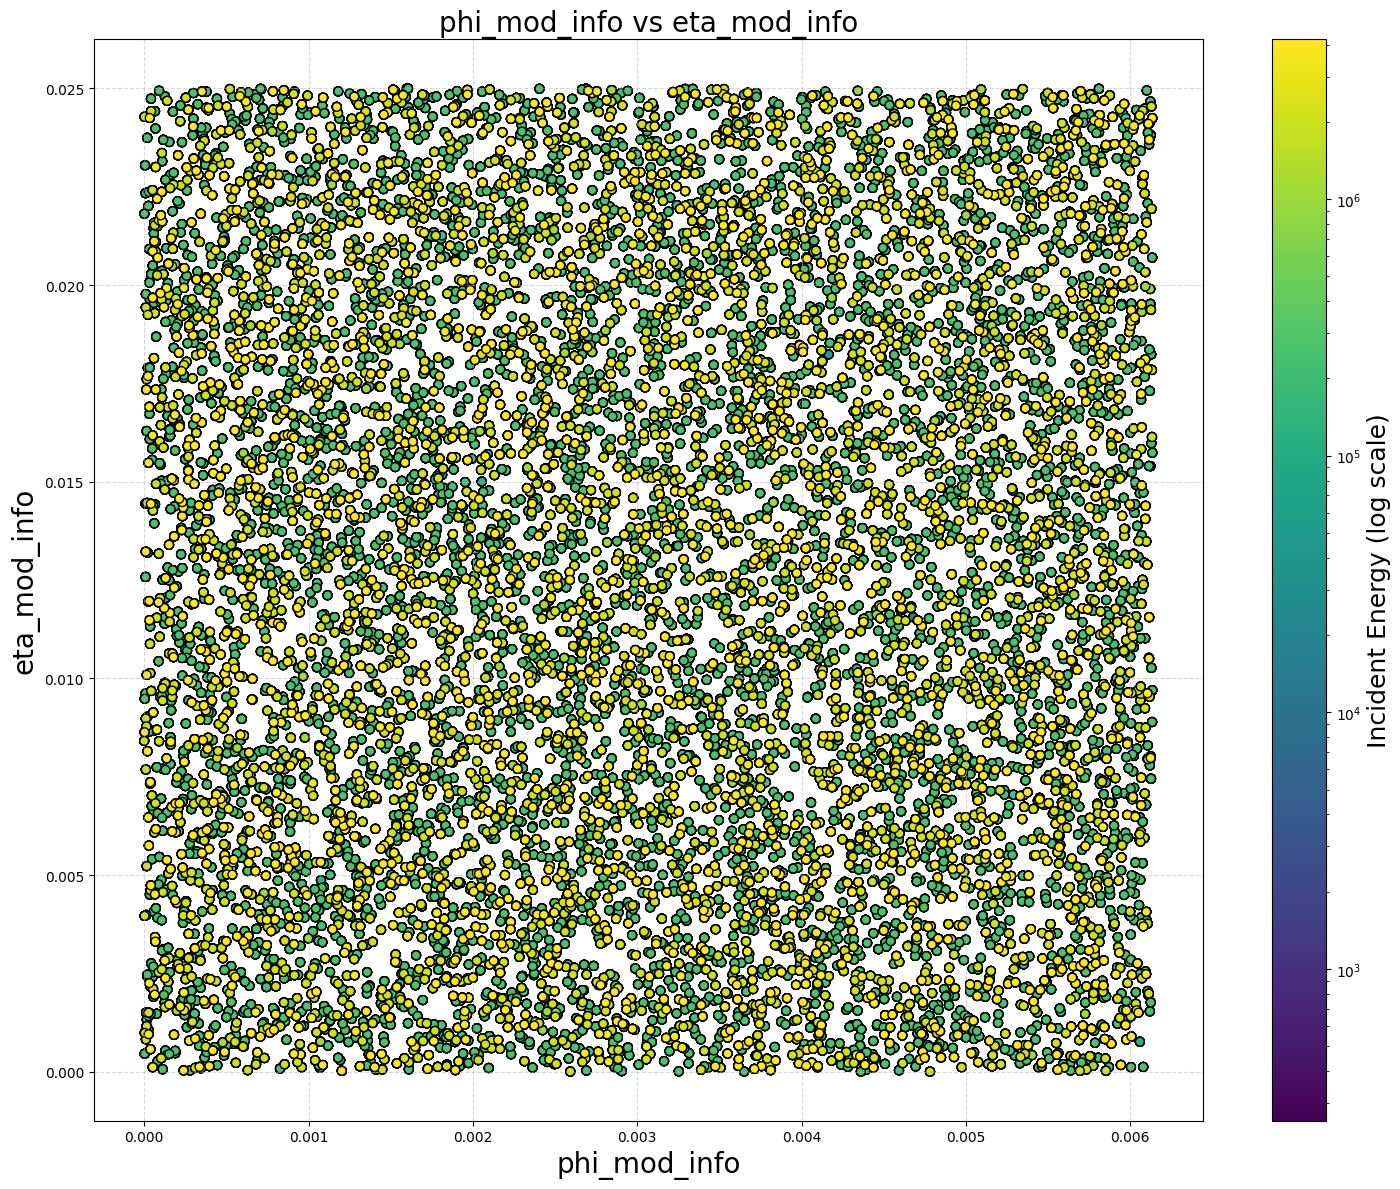

In [ ]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15, 12))
cmap_list = ['viridis', 'plasma', 'inferno', 'magma']

norm = LogNorm(vmin=incident_energy_info.min(), vmax=incident_energy_info.max())

scatter = plt.scatter(
    phi_mod_info,
    eta_mod_info,
    c=incident_energy_info,
    cmap='viridis',
    norm=norm,                     
    alpha=1,
    edgecolors='k',                 
    s=40
)

plt.title('phi_mod_info vs eta_mod_info', fontsize=20)
plt.xlabel('phi_mod_info', fontsize=20)
plt.ylabel('eta_mod_info', fontsize=20)

cbar = plt.colorbar(scatter)
cbar.set_label('Incident Energy (log scale)', fontsize=18)
cbar.ax.set_yscale('log')  
cbar.update_ticks()       

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()